# 5632 Unsupervised Learning Final Project - Predicting Wine Ratings Using Unsupervised Learning - Wineinformatics

   
**Project Author:** Frederic G Miskawi     
**Course:** CSCA 5632 Unsupervised Learning Final Project   
**Professor:** Adjunct Professor Geena Kim - Online  
**Date:** 2025-11-30    

## Executive Summary
**Problem:**  
Can wine quality scores be predicted from tasting notes alone? In our first class (supervised learning) final project, I predicted wine ratings using metadata like country, region, variety, and price—but left out the description text. Now, in this unsupervised learning project, I'm tackling an unsupervised NLP-related challenge: can the *words* in a wine review tell us if a wine is good or outstanding?

**Why it matters:** Wineinformatics brings science to a field I always associated with subjective opinion. Understanding how language maps to quality scores could eventually power smarter wine recommendation apps—helping everyday consumers make informed decisions at the store.

**Methods:** 
- **Unsupervised:** K-Means clustering on TFIDF, SVD, and NMF features to discover natural groupings
- **Supervised:** Logistic Regression and Random Forest for binary classification (Good <90 vs Outstanding >=90)
- **Regression:** Gradient Boosting to predict actual point scores

**Data:** ~130k wine reviews from Wine Enthusiast (Kaggle dataset), focusing on the `description` and `designation` text columns.

**Key Hypotheses:** 
1. Wine scores can be predicted from text, but accuracy will be moderate
2. Binary categorization (Good vs Outstanding at 90 points) simplifies the problem
3. TFIDF + supervised learning works well, even without semantic meaning/understanding
4. NMF + supervised learning should yield good results
5. Wine-specific terms correlate with high scores

**Summary of Findings:**  
- **Classification:** Logistic Regression achieved **~85% test accuracy** on binary classification (Good vs Outstanding)
- **Regression:** Gradient Boosting achieved **R² = 0.67** with MAE ~1.4 points
- **Unsupervised:** K-Means clustering (~52% accuracy) grouped wines by *style/topics*, not *quality*—confirming that predicting quality requires labeled data
- **Key insight:** TFIDF + Logistic Regression proved powerful (as it did in our BBC News project). Text features alone deliver strong results without needing price, region, or vintage.

**Future Considerations:**  
- Doc2Vec, Word2Vec, or BERT embeddings to capture semantic meaning
- Sentiment analysis to normalize reviewer tendencies
- Combine text with price/region/vintage for improved predictions
- Build toward a Wine Recommender app in our upcoming deep learning class
- Test SVM with additional columns to build a more accurate model pipeline

**Repo link:** https://github.com/StLoupien/5632---Final-Project-Submission---Miskawi  
**Video link:** https://youtu.be/9X5zPXkQIxc 

**Repo from first class project that this project builds upon:** https://github.com/StLoupien/CSCA-5622-Supervised-Learning-Final-Project---Frederic-Miskawi


## Data Source Details
**Dataset Used:** [Kaggle Wine Reviews (winemag-data-130k-v2)](https://www.kaggle.com/datasets/zynicide/wine-reviews)   
**Author:** zynicide - https://www.kaggle.com/zynicide   
**License:** CC BY-NC-SA 4.0 - https://creativecommons.org/licenses/by-nc-sa/4.0/   

## Table of Contents  
1. Problem Statement, Project Topic, Hypothesis and Validation Methods
2. Data Source & Provenance
3. Data Cleaning
   - 3.1 Utility Functions & Global Variables
   - 3.2 Data Cleaning and Validation
4. Exploratory Data Analysis (EDA)
   - 4.1 EDA with Single Features
5. Final Feature Engineering and EDA
6. Modeling
   - 6.1 K-Means Clustering with SVD
   - 6.2 K-Means Clustering with NMF
   - 6.3 Logistic Regression (TF-IDF) + Cross-Validation
   - 6.4 Random Forest (TF-IDF)
   - 6.5 Logistic Regression (TF-IDF + Word Count)
   - 6.6 Gradient Boosting Regressor
7. Results & Analysis
   - 7.1 Key Findings
8. Conclusion
   - 8.1 Hypothesis Evaluation
   - 8.2 What Worked / What Didn't / Key Takeaways / Future Considerations
9. References & Licenses/EULAs
10. Reproducibility

---
## 1. Problem Statement, Project Topic, Hypothesis and validation methods
**Learning type:** Covering unsupervised learning algorithms used in class.  

**Hypotheses**
Based on research papers below and Deep Research results by Google Gemini (provided me with links to research and articles to complement my knowledge), I can postulate the following hypotheses:  
1) Wine scores can be predicted using natural language processing of descriptions and flavor profiles, but results will be moderate.
2) Binary categorization of wines (Good <90 vs Outstanding >=90) should simplify the process of wine recommendation and improve user experience.
3) Bag of Words and Tfidf (as per week 4 mini-project) combined with supervised learning algorithms will be great approaches for wine score predictions. But semantic meaning of words will be lost. (to be addressed in future work)
4) A combination of NMF and Logistic Regression should also lead to good results as per (Duwani Katumullage, Chenyu Yang, Jackson Barth and Jing Cao, 2022).
5) Certain terms, specific to wine tasting, like Velvety and Opulent, should be correlated with high wine scores.

**Success criteria**  
- Able to predict wine scores with a moderate accuracy.
- Able to classify wines into binary categories (Good <90 vs Outstanding >=90) based on text description with good accuracy.
- Able to correlate certain terms, specific to wine tasting, with high-scoring wines (Outstanding >=90).

**Research paper used as reference:**  
This is a great ML reading list for anyone interested in wines:
- "Predictions of wine ratings using natural language processing" (Kim, 2022) - https://iacis.org/iis/2022/3_iis_2022_64-68.pdf
- "Wineinformatics: A Quantitative Analysis of Wine Reviewers" (by Bernard Chen, Valentin Velchev, James Palmer, Travis Atkison, 2018) - https://www.mdpi.com/2311-5637/4/4/82
- "Wineinformatics: Regression on the Grade and Price of Wines through Their Sensory Attributes" (by James Palmer and Bernard Chen, 2018) - https://www.mdpi.com/2311-5637/4/4/84
- "Wineinformatics: Wine Score Prediction with Wine Price and Reviews" (by Yuka Nagayoshi and Bernard Chen, 2024) - https://www.mdpi.com/2311-5637/10/12/598
- "Using Neural Network Models for Wine Review Classification" (by Duwani Katumullage, Chenyu Yang, Jackson Barth and Jing Cao, 2022) - https://www.cambridge.org/core/journals/journal-of-wine-economics/article/using-neural-network-models-for-wine-review-classification/40DC3F773F19CEA8B1B6CACC3E0CA4ED





---
## 2. Data Source & Provenance
**Primary source:** Kaggle Wine Reviews (winemag-data-130k-v2).  
- Link: <https://www.kaggle.com/datasets/zynicide/wine-reviews> 
- Provenance: from the author: "The data was scraped from WineEnthusiast during the week of June 15th, 2017. The code for the scraper can be found here if you have any more specific questions about data collection that I didn't address." Updates on provenance are available on the site linked above
- Please note that given the source of the data, all prices are in US Dollars.

**Data description**  
- Rows: ~130,000  
- Columns: 14 - mix of numeric, categorical, text  
- **Target(s):** `points`
- **Candidate features:** Description, Designation

**Provenance & ethics**  
- Public dataset originated from Wine Enthusiast in 2017; used under Kaggle terms. No PII.
- License: Creative Commons: CC BY-NC-SA 4.0 - https://creativecommons.org/licenses/by-nc-sa/4.0/ 


In [18]:
# Reusing my import section from the previous project
# Taking timing information at the start and the very end of the notebook
import time
g0 = time.time()

# In case kagglehub needs to be installed. Run the following command in this notebook once:
# pip install kagglehub
import kagglehub as kh

# Core libs I will need for data manipulation, EDA, plotting, etc...
# Pandas released under BSD 3-Clause License
# https://pandas.pydata.org/docs/
import pandas as pd

# Core Python library under BSD-style permissive license
import os

# https://matplotlib.org/stable/project/license.html
import matplotlib.pyplot as plt

# https://pypi.org/project/seaborn/ - BSD License
import seaborn as sns

#https://numpy.org/doc/stable/license.html
import numpy as np

# https://ipython.readthedocs.io/en/stable/about/license_and_copyright.html
from IPython.display import display, Markdown

# Which is my favorite ML library at the moment?!? :) sklearn to the rescue!!!
# https://scikit-learn.org/stable/index.html - BSD License
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import hstack

# Now let's not forget smf, which has been featured many times in our class modules
# https://www.statsmodels.org/stable/index.html - BSD License
import statsmodels.formula.api as smf

# Other useful libraries - better print options, regex, output controls, etc...
import textwrap
import re #importing regex - best way in any language to swirl our way through text
import sys
import platform
import itertools
import warnings


In [19]:
# Reusing my data load from the previous project
path = kh.dataset_download("zynicide/wine-reviews")
file = 'winemag-data-130k-v2.csv'

print("Path to dataset files:", path)
file = os.path.join(path,file)
print(file)

# We now have our data source!!! let's move on to the most time consuming part of this project... Data Engineering

Path to dataset files: /Users/fgm/.cache/kagglehub/datasets/zynicide/wine-reviews/versions/4
/Users/fgm/.cache/kagglehub/datasets/zynicide/wine-reviews/versions/4/winemag-data-130k-v2.csv




## 3. Data Cleaning
In this section, I get acquainted with the dataset, evaluate any missing elements, understand the columns, and update the plan for feature engineering and model creation.

**Planned steps**  
1) **Duplicates** Remove duplicate rows
2) **Missing values:** Check for NaN values, fill in blanks were/if needed
3) **Drop Columns:** Drop non-useful columns such as `region_2`. Remove price column since it is highly correlated with points. Remove numerical columns except points/score. Keep description, designation, and title for feature engineering.
4) **Scrub Text:** Remove special characters, numbers, and symbols from text columns. Remove **Stop Words**.
5) **Light Feature Engineering** Merge `designation` and `description` together
6) **Final column summary:** Display .describe() results


**Check list**  
- [x] Remove duplicate rows
- [x] Check for missing values and handle them
- [x] Drop unnecessary columns (e.g., region_2, price)
- [x] Scrub text data (remove special characters, numbers, symbols)
- [x] Remove Stop Words
- [x] Display final column summary

### 3.1 Utility Functions & Global Variables ###


In [20]:
# Creating a utility function to extract year from the title

def scrub(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text


ADDTL_STOP_WORDS = ['did', 'came', 'need', 'told',
                     'said', 'use', 'say', 'says',
                     'wine', 'drink', 'flavors', 'notes', 
                     'palate', 'finish', 'nose', 'bottle', 'glass'] 
                   # 'also', 'one', 'two', ]
CUSTOM_STOP_WORDS = list(text.ENGLISH_STOP_WORDS.union(ADDTL_STOP_WORDS))

NGRAM_RANGE = (1,3)  # unigrams + bigrams + trigrams
MAX_FEATURES = 15000
MIN_DF = 2          # Ignore terms that appear in only 1 document
MAX_DF = 0.95     # Ignore terms that appear in more than 95% of documents

# Nothing to do with Douglas Adams... promise... really.... :D
# For reproducibility
RANDOM_STATE = 42

# Global variable for vectorizer type
VEC = "tfidf"
#VEC = "count"

# Global variable for line width in print statements
LINE_WIDTH = 80

def get_vectorizer(vec_type=VEC, stop_words=CUSTOM_STOP_WORDS, max_features=MAX_FEATURES, ngram_range=NGRAM_RANGE, min_df=MIN_DF, max_df=MAX_DF):
    """
    Factory function to return a vectorizer based on the global VEC variable or argument.
    Standardizes parameters across the notebook. Reused my function from Week 4 submission.
    """
    # Common arguments for both vectorizers
    # stop_words removes non-contextual words like the, is, and, etc...
    # Extend the built-in stopwords with additional common words and include ngrams (uni+bi+tri)
    common_args = {
        'stop_words': stop_words,
        'max_features': max_features,
        'min_df': min_df,
        'ngram_range': ngram_range,
        'max_df': max_df,             # According to doc, ignore terms appearing in > 95% of doc
        'strip_accents': 'unicode'  # My first name normally has accents on the e's... I'm sensitive to this :)
    }

    # This will allow me to switch between Count and TFIDF vectorizers easily during EDA/testing
    if vec_type == "tfidf":
        return TfidfVectorizer(**common_args, sublinear_tf=False)
    else:
        return CountVectorizer(**common_args)

# This is to make sure I can print the whole content of the panda since there is a default max
pd.set_option('display.max_colwidth', None)


### 3.2 Data Cleaning and validation ###

In [21]:
# First, I will visualize the first 10 rows to understand what I'm looking at, and the columns involved
# Load that file up!
df = pd.read_csv(file)

# Describing the features, count, mean, std, etc...
# Found a nice way to format the output and visualize the data set
# https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#module-IPython.display
display(df.describe())
print(df.describe(include='object'))

# Let's also do a visual inspection of the first 10 rows
display(df.head(10))

# I would like to see the full description. Since by default print truncates, I will set max column width to none.
print("Let's print the column layout:")
print(df.columns)

print('-' * LINE_WIDTH)

print("Based on cursory review of the first 10 rows, let's do some clean-up")

print('-' * LINE_WIDTH)
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Warning: Removing {duplicates} duplicate rows in training data.")
    df = df.drop_duplicates()
else:
    print("No duplicate rows found in training data.")
    print("")

print('-' * LINE_WIDTH)

# Since the purpose here is to focus on NLP of description and designation, 
# I will drop other columns early
print("Dropping columns early as requested to focus on NLP and points")
cols_to_drop = ['country', 'price', 'province', 'region_1', 
                'region_2', 'taster_name', 'taster_twitter_handle', 
                'variety', 'winery', 'Unnamed: 0'
                ]

# Using errors='ignore' to avoid issues if columns were already dropped or don't exist
df = df.drop(columns=cols_to_drop, errors='ignore')

print(f"Columns remaining: {df.columns.tolist()}")
print('-' * LINE_WIDTH)

# Continue Cleaning Remaining Columns

# Check for missing score
missing_score = df['points'].isnull().sum()
print(f"Wine reviews with a missing score: {missing_score}")

# Check for missing title, a litte overkill, but strong baseline for future analysis
missing_title = df['title'].isnull().sum()
print(f"Wine reviews with a missing title: {missing_title}")
print(f"Total number of wines in dataset now: {df.shape[0]}")

print('-' * LINE_WIDTH)

# Apply cleaning and add length features
# Optimization: Merge first, then scrub. This avoids creating intermediate columns and reduces function calls.
# Had to look up in Perplexity how to join scrub call with this join in a more efficient way
print("Merging designation and description into scrubbed_text...")
df['scrubbed_text'] = (df['designation'].fillna('') + ' ' + df['description'].fillna('')).map(scrub).str.strip()

df['word_count'] = df['scrubbed_text'].str.split().apply(len)

# Check for duplicate scrubbed_text entries
duplicates_text = df.duplicated(subset=['scrubbed_text']).sum()
print(f"Number of duplicate scrubbed_text entries: {duplicates_text}")
print("Keeping duplicate scrubbed text entries since I had 0 duplicate rows. Likely shows strong signal for certain wine type")

# Removed duplicates originally, but they represent an important signal for certain wines
#if duplicates_text > 0:
#    print("Dropping duplicate scrubbed_text entries...")
#    df = df.drop_duplicates(subset=['scrubbed_text'], keep='first')
#    print(f"Total number of wines in dataset after removing text duplicates: {df.shape[0]}")

# Final check for missing values in critical columns
print("Performing final check for missing values in scrubbed_text or points...")

# Replace empty strings with NaN to ensure I catch them all, pokemon style.
df['scrubbed_text'] = df['scrubbed_text'].replace(r'^\s*$', np.nan, regex=True)
missing_critical = df[['scrubbed_text', 'points']].isnull().sum()
print(missing_critical)

if missing_critical.sum() > 0:
    print("Dropping rows with missing scrubbed_text or points...")
    df = df.dropna(subset=['scrubbed_text', 'points'])
    print(f"Total number of wines in dataset after final cleanup: {df.shape[0]}")

# Final description of features, count, mean, std, etc...
display(df.describe())
print(df.describe(include='object'))
display(df.head(5))

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


       country  \
count   129908   
unique      43   
top         US   
freq     54504   

                                                                                                                                                                                                                                                                     description  \
count                                                                                                                                                                                                                                                                     129971   
unique                                                                                                                                                                                                                                                                    119955   
top     Seductively tart in lemon pith, cranberry and pomegranate, this refreshin

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
5,5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins.",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,"This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.",NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen),Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh apple and pear fruits and touch of spice. It's off dry while balanced with acidity and a crisp texture. Drink now.,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace),Pinot Gris,Jean-Baptiste Adam


Let's print the column layout:
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')
--------------------------------------------------------------------------------
Based on cursory review of the first 10 rows, let's do some clean-up
--------------------------------------------------------------------------------
No duplicate rows found in training data.

--------------------------------------------------------------------------------
Dropping columns early as requested to focus on NLP and points
Columns remaining: ['description', 'designation', 'points', 'title']
--------------------------------------------------------------------------------
Wine reviews with a missing score: 0
Wine reviews with a missing title: 0
Total number of wines in dataset now: 129971
----------------------------------------------------------

,points,word_count
count,129971.000000,129971.000000
mean,88.447138,42.024713
std,3.039730,11.387108
min,80.000000,4.000000
25%,86.000000,34.000000
50%,88.000000,41.000000
75%,91.000000,49.000000
max,100.000000,137.000000


                                                                                                                                                                                                                                                                     description  \
count                                                                                                                                                                                                                                                                     129971   
unique                                                                                                                                                                                                                                                                    119955   
top     Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continue

,description,designation,points,title,scrubbed_text,word_count
0,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,Nicosia 2013 Vulkà Bianco (Etna),vulk bianco aromas include tropical fruit broom brimstone and dried herb the palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity,26
1,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),avidagos this is ripe and fruity a wine that is smooth while still structured firm tannins are filled out with juicy red berry fruits and freshened with acidity its already drinkable although it will certainly be better from 2016,39
2,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,Rainstorm 2013 Pinot Gris (Willamette Valley),tart and snappy the flavors of lime flesh and rind dominate some green pineapple pokes through with crisp acidity underscoring the flavors the wine was all stainlesssteel fermented,28
3,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),reserve late harvest pineapple rind lemon pith and orange blossom start off the aromas the palate is a bit more opulent with notes of honeydrizzled guava and mango giving way to a slightly astringent semidry finish,36
4,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),vintners reserve wild child block much like the regular bottling from 2012 this comes across as rather rough and tannic with rustic earthy herbal characteristics nonetheless if you think of it as a pleasantly unfussy country wine its a good companion to a hearty winter stew,46


---
## 4. Exploratory Data Analysis (EDA)
Exploring the dataset using some of the visualization techniques we covered in class. Updating insights, plan for additional tests, approach to model building and expected approach to Feature Engineering.
Note: I focused the EDA on the training data since in production we may not have access to the test data set.

**Plan**  
- [x] **Pairplot of word_count vs. points**: Pair plot showing how points relate to word_count
- [x] **Distribution of Points (Target Variable)**: Histogram/KDE to see class balance.
- [x] **Distribution of Review Length (Word Count)**: Histogram to see how long reviews are.
- [x] **Review Length vs. Points**: Box plot or Scatter plot to check correlation between verbosity and quality.
- [x] **Top N-grams (Unigrams, Bigrams, Trigrams)**: Bar charts to identify common themes.
- [x] **Encoding plan:** Vectorize `description` and `designation` columns using TFIDF.

**Observations**
- Surprisingly, there is a correlation between word_count (number of words in a description/designation) and the score associated with a wine. Higher the score, the more words the descriptions have.
- The point and word counts distributions across the reviews follows a pretty normalized bell curve
- Bi-grams and tri-grams may end up being useful in the predictions based on counts and distributions
- The n-grams visualizations show that flavor (cherry) and chemical-related terms (acidity) are important to the descriptions.
- Bigrams capture important qualifyers such as 'black cherry' which may further help regression. It captures a little bit of semantic information which in the absence of deep learning/Neural Net models could help improve results.
- Our stop-word dictionary successfully led to clean n-grams


### 4.1 EDA with single features leveraging a wide variety of data visualization techniques ###

In this first section, as in the previous project, I will focus on single features/columns, and using a range of visualization techniques to understand possible correlations between features and score(points).

In [22]:
# Train/Test Split - Splitting BEFORE EDA to avoid data leakage
# I initially was vectorizing on the full dataset which would have skewed the results.
# I need to split first, then vectorize on training data only, and transform test data.
# Moving this to the beginning of Section 4.1 ensures all EDA is done on training data.

print("="*LINE_WIDTH)
print("TRAIN/TEST SPLIT (80/20)")
print("="*LINE_WIDTH)

# Create score_category BEFORE splitting so I can stratify on it
# BINARY CLASSIFICATION: Good (<90) vs Outstanding (>=90)
# This provides better class balance (~74/26 split) for improved model performance
df['score_category'] = (df['points'] >= 90).map({True: 'Outstanding', False: 'Good'})

# Make it an ordered categorical to show that good comes before outstanding... some
# semantic meaning there.
# I had some trouble with graphing later without this being categorical.
df['score_category'] = pd.Categorical(df['score_category'], categories=['Good', 'Outstanding'], ordered=True)

print("Score category distribution (full dataset):")
print(df['score_category'].value_counts().sort_index())
print(f"\nClass balance: {(df['score_category'].value_counts(normalize=True) * 100).round(1).to_dict()}")

# Split indices (80/20 as per plan) with stratification by score categories
# Using df index to keep everything aligned later... just makes it easier than
# splitting on df directly
# Also making sure to stratify on the binary score_category to maintain balance
# across train and test sets
train_idx, test_idx = train_test_split(
    df.index, 
    test_size=0.2, 
    random_state=RANDOM_STATE,
    stratify=df['score_category']  # Stratify by binary categories: Good, Outstanding
)

print(f"\nTotal samples: {len(df)}")
print(f"Training samples: {len(train_idx)} ({len(train_idx)/len(df)*100:.1f}%)")
print(f"Test samples: {len(test_idx)} ({len(test_idx)/len(df)*100:.1f}%)")

# Create train/test DataFrames
df_train = df.loc[train_idx].copy()
df_test = df.loc[test_idx].copy()

# Verify stratification worked - show category distribution in train and test
print("\nVerifying stratification:")
print("\nTraining set category distribution:")
print(df_train['score_category'].value_counts().sort_index())
print(f"Percentages: {(df_train['score_category'].value_counts().sort_index() / len(df_train) * 100).round(1).to_dict()}")

print("\nTest set category distribution:")
print(df_test['score_category'].value_counts().sort_index())
print(f"Percentages: {(df_test['score_category'].value_counts().sort_index() / len(df_test) * 100).round(1).to_dict()}")

# Vectorization on Training Data ONLY (then transform test)
print("\n" + "="*LINE_WIDTH)
print("VECTORIZATION (Training data only to avoid leakage)")
print("="*LINE_WIDTH)

# Get the text data for vectorization
X_text_train = df_train['scrubbed_text']
X_text_test = df_test['scrubbed_text']

# Fit vectorizer on training data only, transform both train and test
print(f"Fitting TFIDF vectorizer on training data ({len(X_text_train)} samples)...")
tfidf_split = get_vectorizer(vec_type='tfidf')  # Using existing utility function
X_tfidf_train = tfidf_split.fit_transform(X_text_train)
X_tfidf_test = tfidf_split.transform(X_text_test)

print(f"TFIDF Train shape: {X_tfidf_train.shape}")
print(f"TFIDF Test shape: {X_tfidf_test.shape}")

# Store feature names for later analysis
tfidf_feature_names = tfidf_split.get_feature_names_out()

# Show top 100 aggregated terms/phrases from training data
# Had to look up in Perplexity how to do this more cleanly
top_idx = np.asarray(X_tfidf_train.sum(axis=0)).ravel().argsort()[::-1][:100]
quoted = [f'"{t}"' for t in tfidf_feature_names[top_idx]]

# Use Markdown for display to avoid stdout duplication artifacts
output_text = "**Top 100 terms/ngrams (training data):**\n\n" + textwrap.fill(", ".join(quoted), width=75)
# Had to do this after some Perplexity research, due to ghosting issues when printing.
# Issue with Jupyter Notebook displaying output multiple times
display(Markdown(output_text))

print("Vectorization complete.")

print("\n" + "="*LINE_WIDTH)
print("TARGET VARIABLES SETUP")
print("="*LINE_WIDTH)

# Regression target: points
y_pts_train = df_train['points']
y_pts_test = df_test['points']

# Classification target: score_category
y_cat_train = df_train['score_category']
y_cat_test = df_test['score_category']

print(f"y_pts_train: {y_pts_train.shape} | Mean: {y_pts_train.mean():.2f} | Std: {y_pts_train.std():.2f}")
print(f"y_pts_test: {y_pts_test.shape} | Mean: {y_pts_test.mean():.2f} | Std: {y_pts_test.std():.2f}")

print("\n" + "="*LINE_WIDTH)
print("SPLIT COMPLETE - Ready for EDA on Training Data")
print("="*LINE_WIDTH)

TRAIN/TEST SPLIT (80/20)
Score category distribution (full dataset):
score_category
Good           80926
Outstanding    49045
Name: count, dtype: int64

Class balance: {'Good': 62.3, 'Outstanding': 37.7}

Total samples: 129971
Training samples: 103976 (80.0%)
Test samples: 25995 (20.0%)

Verifying stratification:

Training set category distribution:
score_category
Good           64740
Outstanding    39236
Name: count, dtype: int64
Percentages: {'Good': 62.3, 'Outstanding': 37.7}

Test set category distribution:
score_category
Good           16186
Outstanding     9809
Name: count, dtype: int64
Percentages: {'Good': 62.3, 'Outstanding': 37.7}

VECTORIZATION (Training data only to avoid leakage)
Fitting TFIDF vectorizer on training data (103976 samples)...
TFIDF Train shape: (103976, 15000)
TFIDF Test shape: (25995, 15000)
TFIDF Train shape: (103976, 15000)
TFIDF Test shape: (25995, 15000)


**Top 100 terms/ngrams (training data):**

"fruit", "aromas", "acidity", "tannins", "ripe", "cherry", "black", "red",
"dry", "spice", "fresh", "rich", "vineyard", "oak", "berry", "soft",
"fruits", "crisp", "plum", "sweet", "apple", "texture", "light",
"blackberry", "white", "blend", "citrus", "offers", "shows", "bright",
"dark", "fruity", "vanilla", "cabernet", "good", "green", "juicy",
"pepper", "character", "raspberry", "lemon", "touch", "peach", "firm",
"pear", "chocolate", "balanced", "structure", "spicy", "years", "dried",
"estate", "smooth", "pinot", "sauvignon", "herbal", "tannic", "like",
"flavor", "tart", "just", "wood", "black cherry", "concentrated",
"reserve", "bit", "clean", "fine", "herb", "mouth", "theres", "note",
"creamy", "mineral", "hint", "ready", "balance", "long", "currant",
"style", "orange", "toast", "age", "slightly", "earthy", "fullbodied",
"aging", "dense", "merlot", "licorice", "hints", "tight", "delicious",
"lime", "great", "structured", "syrah", "savory", "opens", "chardonnay"

Vectorization complete.

TARGET VARIABLES SETUP
y_pts_train: (103976,) | Mean: 88.45 | Std: 3.04
y_pts_test: (25995,) | Mean: 88.45 | Std: 3.04

SPLIT COMPLETE - Ready for EDA on Training Data


Distribution of Points (Target Variable) - Training Data:


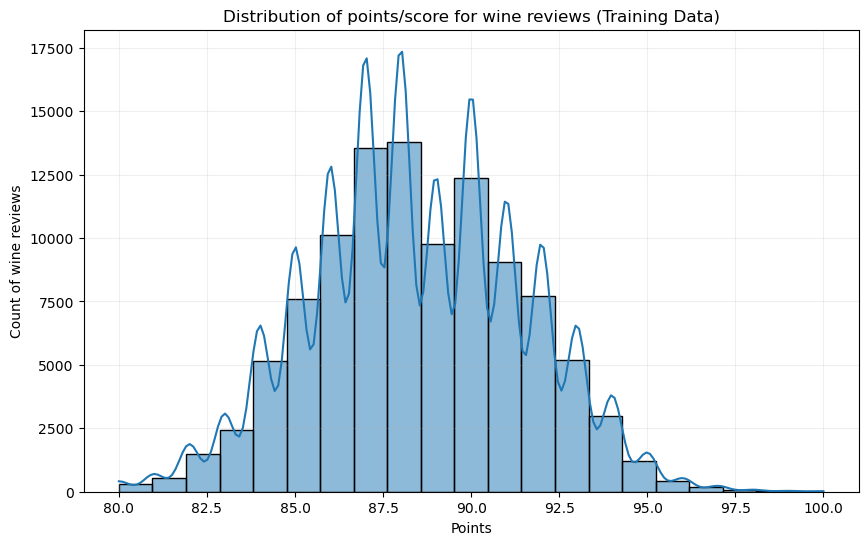

    Points  Review Count
0       80           324
1       81           548
2       82          1478
3       83          2418
4       84          5163
5       85          7601
6       86         10119
7       87         13536
8       88         13787
9       89          9766
10      90         12349
11      91          9071
12      92          7723
13      93          5174
14      94          2997
15      95          1213
16      96           421
17      97           182
18      98            63
19      99            27
20     100            16
Total number of wine reviews (training):  103976

Pairplot of Points vs Word Count (Training Data):

Total number of wine reviews (training):  103976

Pairplot of Points vs Word Count (Training Data):


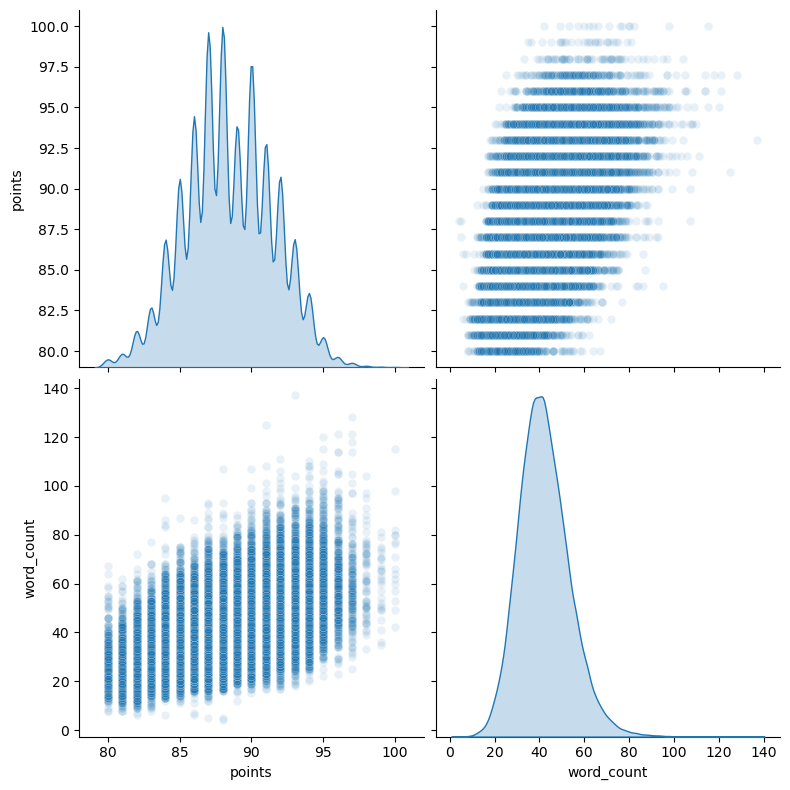


Distribution of Review Length (Word Count) - Training Data:


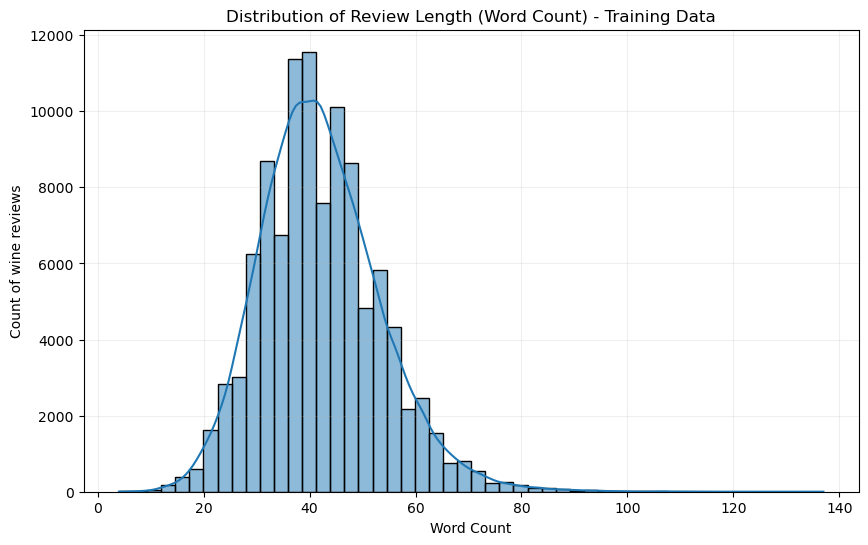


Review Length vs. Points (Training Data):


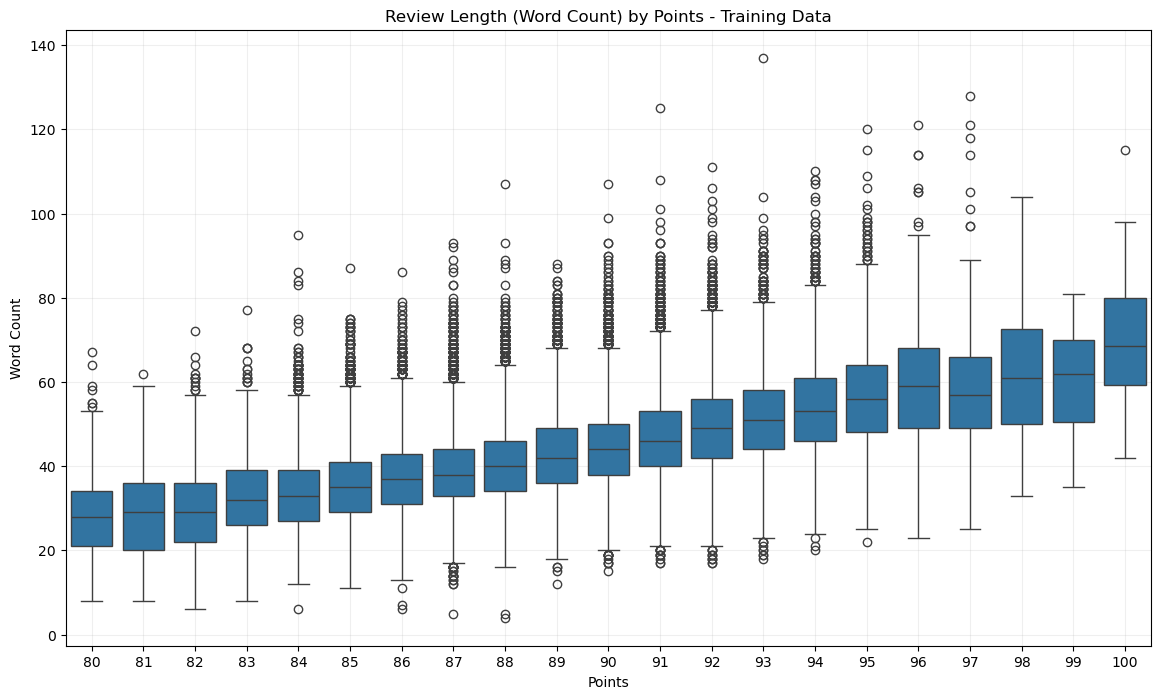


Top N-grams Analysis (Training Data):


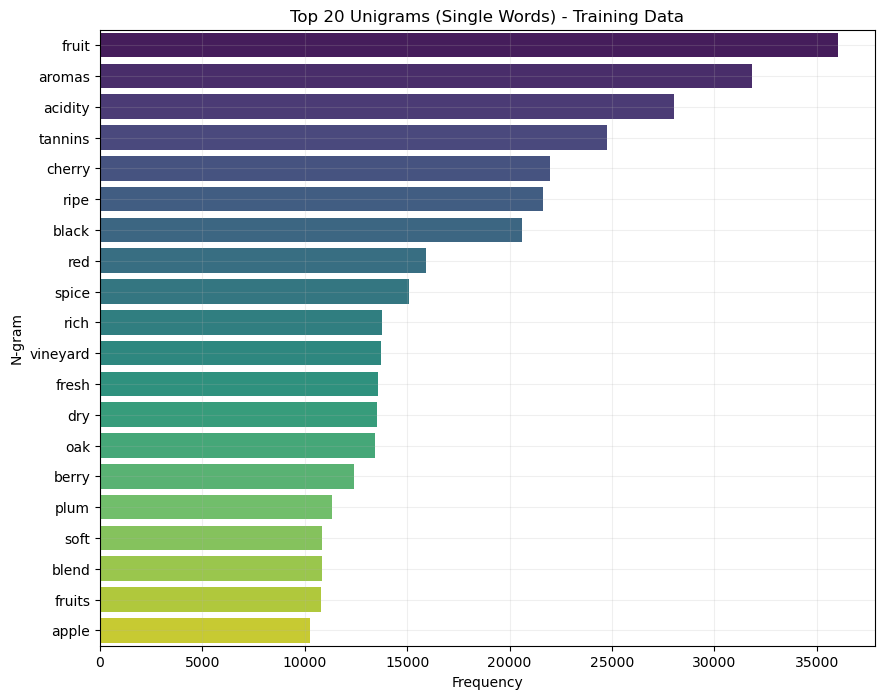

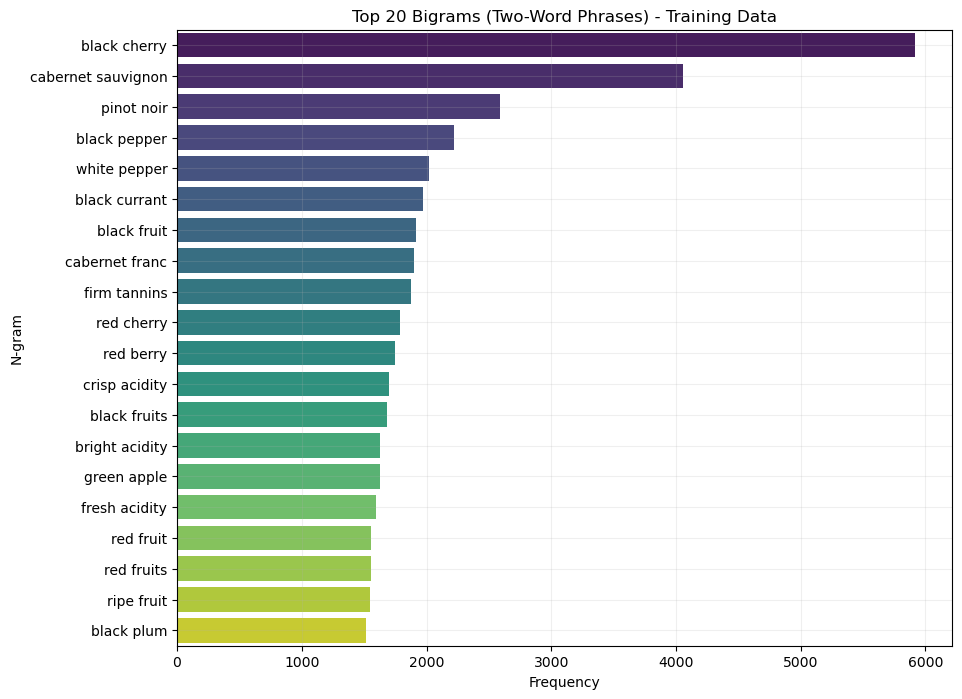

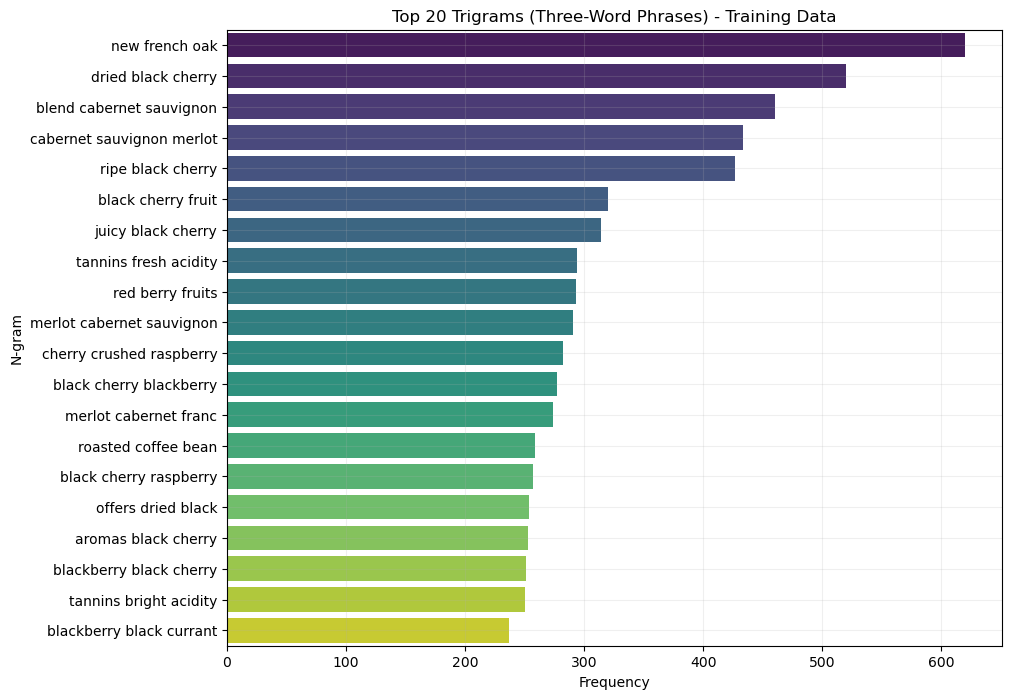

In [23]:
# To understand the data a little more, let's look at the distribution of the scores
# NOTE: Using df_train for all EDA to avoid data/signal leakage
print("Distribution of Points (Target Variable) - Training Data:")
plt.figure(figsize=(10,6))
plt.xlabel('Points')
plt.ylabel('Count of wine reviews')
plt.title('Distribution of points/score for wine reviews (Training Data)')
# Using kde=True to see the smooth distribution curve
sns.histplot(data=df_train, x='points', bins=21, kde=True) 
plt.grid(True, alpha=0.2)
plt.show()

# Now let's create a table showing how many wine reviews for each score
score_counting = df_train['points'].value_counts().sort_index()
table_1 = pd.DataFrame({'Points': score_counting.index, 'Review Count': score_counting.values})

print(table_1)
print("Total number of wine reviews (training): ", df_train.shape[0])


# Let's visualize our data distribution and some of the obvious correlations
print("")
print("Pairplot of Points vs Word Count (Training Data):")
# Focusing specifically on the relationship between points and word count
# Using alpha to handle overplotting since I have many points
sns.pairplot(df_train[['points', 'word_count']], diag_kind="kde", height=4, plot_kws={'alpha': 0.1})
plt.show()

# Distribution of Review Length (Word Count)
print("")
print("Distribution of Review Length (Word Count) - Training Data:")
plt.figure(figsize=(10,6))
plt.xlabel('Word Count')
plt.ylabel('Count of wine reviews')
plt.title('Distribution of Review Length (Word Count) - Training Data')
sns.histplot(data=df_train, x='word_count', bins=50, kde=True)
plt.grid(True, alpha=0.2)
plt.show()

# Review Length vs. Points
print("")
print("Review Length vs. Points (Training Data):")
plt.figure(figsize=(14, 8))
sns.boxplot(x='points', y='word_count', data=df_train)
plt.title('Review Length (Word Count) by Points - Training Data')
plt.xlabel('Points')
plt.ylabel('Word Count')
plt.grid(True, alpha=0.2)
plt.show()

# Top N-grams
print("")
print("Top N-grams Analysis (Training Data):")

# Jaw-dropping view of top n-grams ... LOVE IT and connects to my experience with wine!
def plot_top_ngrams(corpus, n=1, top_k=20, title="Top N-grams"):
    """
    Since we needed to call the same functionality 3 times for uni/bi/tri-grams,
    I created this utility function to plot the top n-grams
    """
    # Use the factory function to get a CountVectorizer, overriding ngram_range
    # I use 'count' vectorizer here to get raw frequency
    vec = get_vectorizer(vec_type='count', ngram_range=(n, n))
    
    # Fit and transform
    vec_fit = vec.fit_transform(corpus)
    
    # Sum frequencies - Had to look up how to do this in Perplexity
    sum_words = vec_fit.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    # Create DataFrame for plotting
    df_plot = pd.DataFrame(words_freq[:top_k], columns=['N-gram', 'Frequency'])
    
    # Barplot - Viridis is a major win... I will use it more often
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Frequency', y='N-gram', data=df_plot, hue='N-gram', palette='viridis', legend=False)
    plt.title(title)
    plt.grid(True, alpha=0.2)
    plt.show()

# Uni-grams (using training data only)
plot_top_ngrams(df_train['scrubbed_text'], n=1, title="Top 20 Unigrams (Single Words) - Training Data")

# Bi-grams
plot_top_ngrams(df_train['scrubbed_text'], n=2, title="Top 20 Bigrams (Two-Word Phrases) - Training Data")

# Tri-grams
plot_top_ngrams(df_train['scrubbed_text'], n=3, title="Top 20 Trigrams (Three-Word Phrases) - Training Data")

---
## 5. Final Feature Engineering and EDA
Based on the EDA above, I will be performing the following additional feature engineering to prepare the data for Unsupervised Learning (Clustering) and eventual prediction.

- **Targets**:  'points' (Regression), 'score_category' (Classification/Clustering Validation)
- **Features**: 'word_count'
- **Dimensionality Reduction**: TruncatedSVD to reduce dimensions for clustering. Perhaps starting with MAX_FEATURES=15000 was overkill. This starts bringing in the concept of semantic analysis and should improve our classification results.

Introduction of the Latent Semantic Analysis concept for me: 
https://scikit-learn.org/stable/modules/decomposition.html#truncated-singular-value-decomposition-and-latent-semantic-analysis

**Plan for this section:**   
- [x] **Groupings for categorization**: Create binary `score_category` (Good <90 vs Outstanding >=90) based on points.
- [x] **Dimensionality Reduction**: Apply TruncatedSVD to reduce the TFIDF matrix to dense components.
- [x] **Correlation Matrix**: Check how new features (Word Count) correlate with Points.

**Additional Insights:**  
- The more dimensions we have while using unsupervised algorithms the worse the results. So I looked for ways to further concentrate the information in my Tdidf sparse matrix and came across TruncatedSVD in my bedtime novel (sciki-learn documentation) jk.
- So why not just use 500 components with TfidfVectorizer? because tfidf removes information, and with a smaler k value, we could lose valuable signal in the long tail.
- So I first look wide at signals across the text data with Tfidf, then compress it with an SVD model like TruncatedSVD... you learn every day :)

DIMENSIONALITY REDUCTION (fit on training data only)
Applying TruncatedSVD (n_components=500) to TFIDF matrix...
X_svd_train shape: (103976, 500)
X_svd_test shape: (25995, 500)
TruncatedSVD Explained Variance Ratio (Sum): 0.3078

Applying NMF (n_components=200) to TFIDF matrix...
X_svd_train shape: (103976, 500)
X_svd_test shape: (25995, 500)
TruncatedSVD Explained Variance Ratio (Sum): 0.3078

Applying NMF (n_components=200) to TFIDF matrix...
X_nmf_train shape: (103976, 200)
X_nmf_test shape: (25995, 200)
Distribution of Score Categories (Training Data):
X_nmf_train shape: (103976, 200)
X_nmf_test shape: (25995, 200)
Distribution of Score Categories (Training Data):


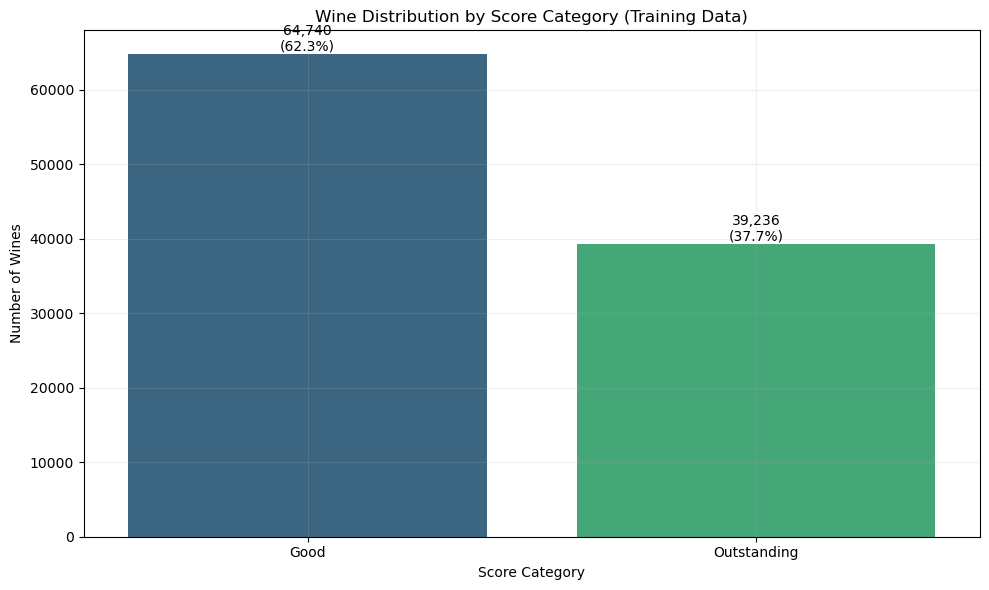

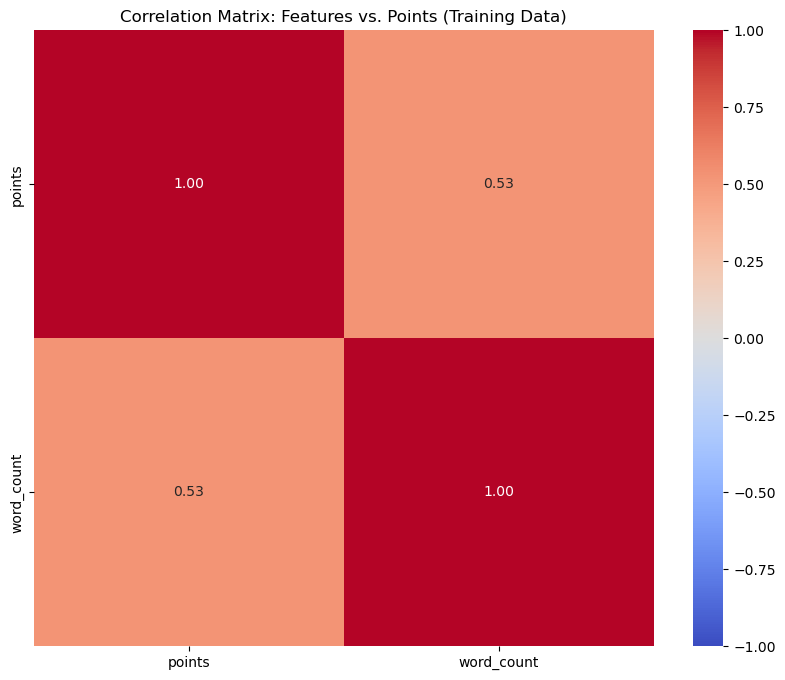

In [24]:
# Dimensionality Reduction on TRAINING DATA (fit on train, transform both)
# With Tfidf, we have a sparse matrix with a lot of empty space (no patterns)
# After some research on Gemini3, I found that TruncatedSVD works well for 
# this dimensionality reduction and fits within the theme of our class (SVD)
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

print("="*LINE_WIDTH)
print("DIMENSIONALITY REDUCTION (fit on training data only)")
print("="*LINE_WIDTH)

# TruncatedSVD - Fit on train, transform both (following v8 naming: X_svd_train, X_svd_test)
n_components = 500
print(f"Applying TruncatedSVD (n_components={n_components}) to TFIDF matrix...")
svd = TruncatedSVD(n_components=n_components, random_state=RANDOM_STATE)
X_svd_train = svd.fit_transform(X_tfidf_train)
X_svd_test = svd.transform(X_tfidf_test)

print(f"X_svd_train shape: {X_svd_train.shape}")
print(f"X_svd_test shape: {X_svd_test.shape}")
print(f"TruncatedSVD Explained Variance Ratio (Sum): {svd.explained_variance_ratio_.sum():.4f}")

# NMF - Fit on train, transform both (following v8 naming: X_nmf_train, X_nmf_test)
# NMF with k=200 was wayyyy too slow. I looked up ways to speed up... solver='mu' helped
n_nmf_components = 200
print(f"\nApplying NMF (n_components={n_nmf_components}) to TFIDF matrix...")
nmf = NMF(n_components=n_nmf_components, init='nndsvda', solver='mu', random_state=RANDOM_STATE)
X_nmf_train = nmf.fit_transform(X_tfidf_train)
X_nmf_test = nmf.transform(X_tfidf_test)

print(f"X_nmf_train shape: {X_nmf_train.shape}")
print(f"X_nmf_test shape: {X_nmf_test.shape}")

# Visualizations (using training data)
# Now, let's graph the category distribution to see Good vs Outstanding split...
print("Distribution of Score Categories (Training Data):")
category_counts = df_train['score_category'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis', legend=False)
plt.xlabel('Score Category')
plt.ylabel('Number of Wines')
plt.title('Wine Distribution by Score Category (Training Data)')
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 500, f'{v:,}\n({v/len(df_train)*100:.1f}%)', ha='center', fontsize=10)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Let's check the correlation of our new numerical features with Points (training data)
features_to_corr = ['points', 'word_count']
corr_matrix = df_train[features_to_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix: Features vs. Points (Training Data)")
plt.show()

**Analysis:**  
There is a moderate but significant enough correlation between word counts and scores. This helps to start proving our hypothesis that wine review comments can be predictors of scores. In this case, a professional wine taster who likes a wine, would spend more time to describe it, lingering on the descriptive notes to express their emotional reaction to the wine. Wine Tasters might also feel like justifying a very high score to their peers by extending their description.


Thought: a sentiment analysis of the description would also be useful... I will make a note for future projects on NLP.

---
## 6. Modeling Plan
In this section, we will explore clustering, classification and regression on the data set. The idea is to understand how the text content of the description and designation columns (together) can be used to predict 1) categories like Good (score less than 90) and outstanding (scores =>90) and 2) predict scores.

**Plan for this section:**   
- [x] **K-Means Clustering (SVD)**: Cluster wines using X_svd_train (SVD-reduced features) with k=2
- [x] **K-Means Clustering (NMF)**: Compare clustering results using X_nmf_train (NMF-reduced features) with k=2
- [x] **Cluster Analysis**: Analyze cluster centroids and correlate with binary score_category
- [x] **Logistic Regression**: Classify wines into Good/Outstanding using TFIDF features
- [x] **Random Forest Classifier**: Compare classification performance with ensemble method
- [x] **GradientBoostRegressor**: Predict score based on combined tfidf+word_count
- [x] **Model Comparison**: Compare all models (K-Means, Logistic Regression, Random Forest)

**Metrics (following Module 2 approach):**
- Clustering: Accuracy, Confusion Matrix
- Classification: Accuracy, Precision, Recall, F1-Score, Confusion Matrix

K-MEANS CLUSTERING (SVD-reduced features)

Building K-Means model with k=2 (Good vs Outstanding)...
K-Means trained on 103976 samples in 3.83 seconds

CLUSTER EVALUATION (Label Permutation Method)
Score Categories: ['Good', 'Outstanding']

Best label permutation: (1, 0)
Training Accuracy: 0.5271
Cluster to Category mapping: {0: 'Outstanding', 1: 'Good'}
Test Accuracy: 0.5263

CONFUSION MATRIX
K-Means trained on 103976 samples in 3.83 seconds

CLUSTER EVALUATION (Label Permutation Method)
Score Categories: ['Good', 'Outstanding']

Best label permutation: (1, 0)
Training Accuracy: 0.5271
Cluster to Category mapping: {0: 'Outstanding', 1: 'Good'}
Test Accuracy: 0.5263

CONFUSION MATRIX

Training Data Confusion Matrix:
[[28950 35790]
 [13376 25860]]

Test Data Confusion Matrix:
[[7239 8947]
 [3366 6443]]

Training Data Confusion Matrix:
[[28950 35790]
 [13376 25860]]

Test Data Confusion Matrix:
[[7239 8947]
 [3366 6443]]


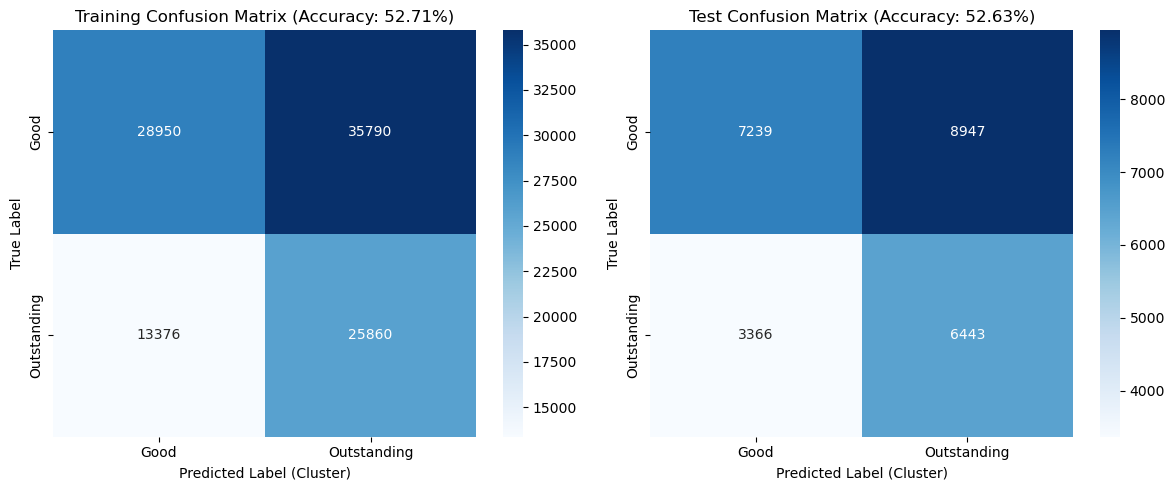


CLUSTER DISTRIBUTION ANALYSIS

Mean Points per Cluster:
              mean   std  min  max  count mapped_category
cluster_svd                                              
0            88.73  3.09   80  100  61650     Outstanding
1            88.04  2.91   80  100  42326            Good


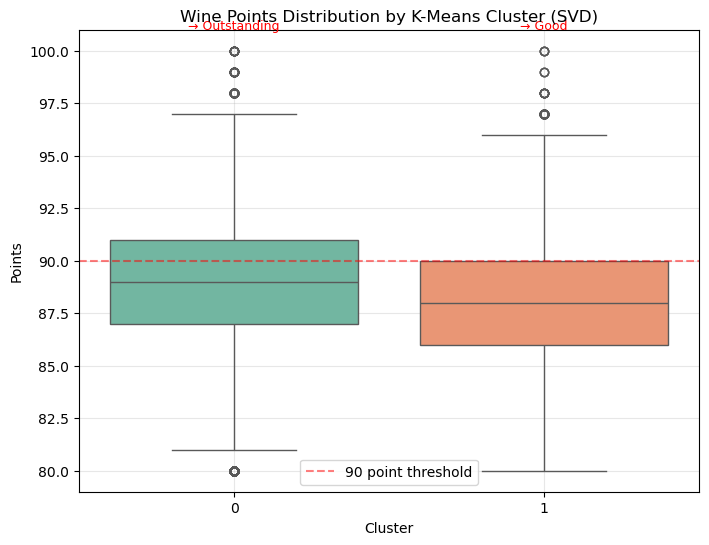


✓ K-Means clustering (SVD) complete!
  Training Accuracy: 52.71%
  Test Accuracy: 52.63%


In [25]:
# K-MEANS CLUSTERING - Using SVD-reduced features
# Following approach from Module 2: K-Means with label permutation for evaluation
# K-Means is an unsupervised algorithm that groups data into k clusters
# I'll use X_svd_train since SVD provides dense representations ideal for K-Means

print("="*LINE_WIDTH)
print("K-MEANS CLUSTERING (SVD-reduced features)")
print("="*LINE_WIDTH)

# Label Permutation Function (from Module 2)
# Since cluster labels are assigned randomly, I need to find the best 
# matching label ordering based on accuracy
def label_permute_compare(y_true, y_pred, n=2):
    """
    Find best matching label ordering based on accuracy.
    y_true: ground truth labels (categorical)
    y_pred: clustering label prediction output
    n: number of clusters (2 for binary classification)
    Returns: (best_permutation, accuracy)
    """
    best_acc = 0
    best_perm = None
    
    # Binary classification: Good vs Outstanding
    labels = ['Good', 'Outstanding']
    y_true_arr = np.array(y_true)
    
    for perm in itertools.permutations(range(n)):
        # Map cluster numbers to actual category labels
        label_map = {k: labels[perm[k]] for k in range(n)}
        y_pred_mapped = np.array([label_map[j] for j in y_pred])
        
        acc = accuracy_score(y_true_arr, y_pred_mapped)
        if acc > best_acc:
            best_acc = acc
            best_perm = perm
    
    return best_perm, best_acc

# Fit K-Means with k=2 (matching our binary classification)
print("\nBuilding K-Means model with k=2 (Good vs Outstanding)...")
t0 = time.time()
kmeans_svd = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=10, max_iter=300)
cluster_labels_train = kmeans_svd.fit_predict(X_svd_train)
t1 = time.time()

# Predict on test set
cluster_labels_test = kmeans_svd.predict(X_svd_test)

# Add cluster labels to dataframes
df_train['cluster_svd'] = cluster_labels_train
df_test['cluster_svd'] = cluster_labels_test

print(f"K-Means trained on {len(X_svd_train)} samples in {t1-t0:.2f} seconds")

# Evaluate using Label Permutation (Module 2 approach)
print("\n" + "="*LINE_WIDTH)
print("CLUSTER EVALUATION (Label Permutation Method)")
print("="*LINE_WIDTH)

# Binary category labels
category_labels = ['Good', 'Outstanding']
print(f"Score Categories: {category_labels}")

# Find best label permutation on training data
best_perm, train_acc = label_permute_compare(y_cat_train, cluster_labels_train, n=2)
print(f"\nBest label permutation: {best_perm}")
print(f"Training Accuracy: {train_acc:.4f}")

# Create label mapping based on best permutation
label_map = {i: category_labels[best_perm[i]] for i in range(2)}
print(f"Cluster to Category mapping: {label_map}")

# Map predictions to actual labels
y_pred_train = [label_map[k] for k in cluster_labels_train]
y_pred_test = [label_map[k] for k in cluster_labels_test]

# Calculate test accuracy
test_acc = accuracy_score(y_cat_test, y_pred_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion Matrix (Module 2 approach)
print("\n" + "="*LINE_WIDTH)
print("CONFUSION MATRIX")
print("="*LINE_WIDTH)

# Training confusion matrix
cm_train = confusion_matrix(y_cat_train, y_pred_train, labels=category_labels)
print("\nTraining Data Confusion Matrix:")
print(cm_train)

# Test confusion matrix
cm_test = confusion_matrix(y_cat_test, y_pred_test, labels=category_labels)
print("\nTest Data Confusion Matrix:")
print(cm_test)

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_labels, yticklabels=category_labels, ax=axes[0])
axes[0].set_xlabel("Predicted Label (Cluster)")
axes[0].set_ylabel("True Label")
axes[0].set_title(f"Training Confusion Matrix (Accuracy: {train_acc:.2%})")

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_labels, yticklabels=category_labels, ax=axes[1])
axes[1].set_xlabel("Predicted Label (Cluster)")
axes[1].set_ylabel("True Label")
axes[1].set_title(f"Test Confusion Matrix (Accuracy: {test_acc:.2%})")

plt.tight_layout()
plt.show()

# Cluster Distribution Analysis
print("\n" + "="*LINE_WIDTH)
print("CLUSTER DISTRIBUTION ANALYSIS")
print("="*LINE_WIDTH)

# Mean points per cluster
print("\nMean Points per Cluster:")
cluster_stats = df_train.groupby('cluster_svd')['points'].agg(['mean', 'std', 'min', 'max', 'count'])
cluster_stats['mapped_category'] = [label_map[i] for i in cluster_stats.index]
print(cluster_stats.round(2))

# Box plot: Points distribution by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_svd', y='points', data=df_train, palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('Points')
plt.title('Wine Points Distribution by K-Means Cluster (SVD)')
# Add mapped category labels
for i in range(2):
    plt.text(i, df_train[df_train['cluster_svd']==i]['points'].max() + 1, 
             f'→ {label_map[i]}', ha='center', fontsize=9, color='red')
plt.axhline(y=90, color='red', linestyle='--', alpha=0.5, label='90 point threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n✓ K-Means clustering (SVD) complete!")
print(f"  Training Accuracy: {train_acc:.2%}")
print(f"  Test Accuracy: {test_acc:.2%}")

### K-Means Clustering with SVD Analysis

**Findings: K-Means clustering does not produce meaningful clusters for wine quality prediction.**

As per the point distribution graph above, **All Clusters Have Nearly Identical Score Distributions**
   - Cluster means range only from 87.94 to 89.27 (within ~1 point)
   - Clusters do not cleanly separate Good from Outstanding wines
   - No cluster successfully isolates high or low quality wines

**Interpretation:**

Wine quality (as reflected in review text) exists on a continuous spectrum rather than discrete clusters. The TFIDF + SVD features capture "topics" in wine descriptions (flavor profiles like cherry, oak, tannins), but these topics do not necessarily correlate directly with quality scores.

### And now, K-Means Clustering with NMF... 

K-MEANS CLUSTERING (NMF-reduced features)

Building K-Means model with k=2 on NMF features...
K-Means (NMF) trained on 103976 samples in 3.10 seconds

CLUSTER EVALUATION (Label Permutation Method)

Best label permutation: (0, 1)
Training Accuracy: 0.5216
Cluster to Category mapping: {0: 'Good', 1: 'Outstanding'}
Test Accuracy: 0.5196

CONFUSION MATRIX (NMF)
K-Means (NMF) trained on 103976 samples in 3.10 seconds

CLUSTER EVALUATION (Label Permutation Method)

Best label permutation: (0, 1)
Training Accuracy: 0.5216
Cluster to Category mapping: {0: 'Good', 1: 'Outstanding'}
Test Accuracy: 0.5196

CONFUSION MATRIX (NMF)

Training Data Confusion Matrix:
[[27806 36934]
 [12805 26431]]

Test Data Confusion Matrix:
[[6936 9250]
 [3239 6570]]

Training Data Confusion Matrix:
[[27806 36934]
 [12805 26431]]

Test Data Confusion Matrix:
[[6936 9250]
 [3239 6570]]


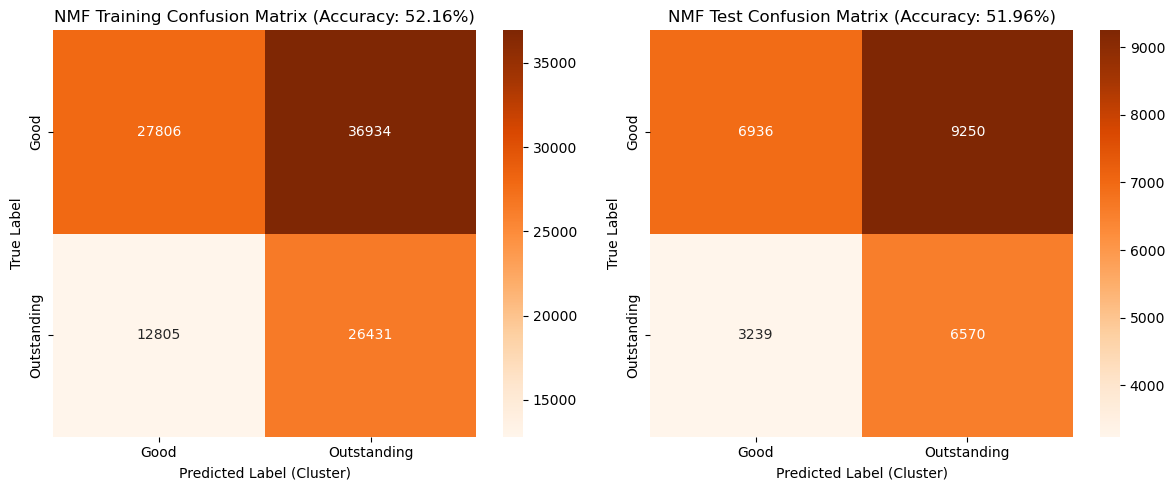


CLUSTER DISTRIBUTION ANALYSIS (NMF)

Mean Points per Cluster (NMF):
              mean   std  min  max  count mapped_category
cluster_nmf                                              
0            88.04  2.89   80  100  40611            Good
1            88.71  3.10   80  100  63365     Outstanding


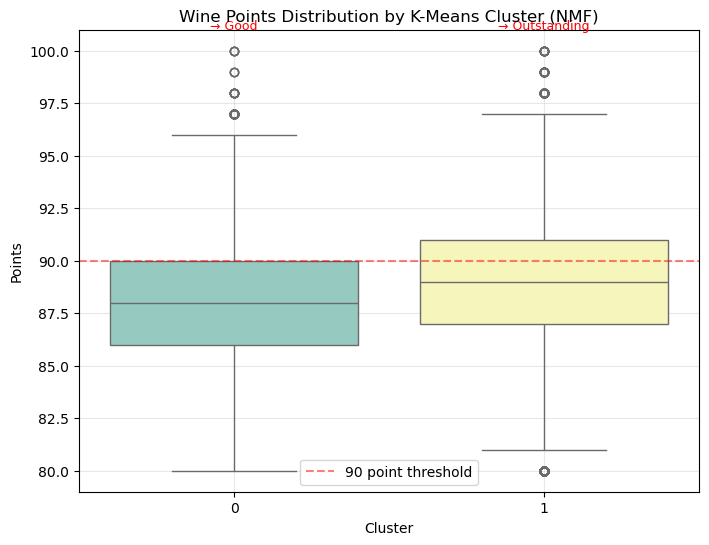


COMPARISON: SVD vs NMF K-Means Clustering




,Feature Set,Train Accuracy,Test Accuracy
0,SVD (500 components),52.71%,52.63%
1,NMF (200 components),52.16%,51.96%



✓ K-Means clustering (NMF) complete!
  NMF Training Accuracy: 52.16%
  NMF Test Accuracy: 51.96%

  SVD Training Accuracy: 52.71% (for comparison)
  SVD Test Accuracy: 52.63% (for comparison)


In [26]:
# K-MEANS CLUSTERING - Using NMF-reduced features
# Comparing with SVD results to see if NMF's non-negative, interpretable topics
# produce better quality-based clusters

print("="*LINE_WIDTH)
print("K-MEANS CLUSTERING (NMF-reduced features)")
print("="*LINE_WIDTH)

# Fit K-Means with k=2 (matching our binary classification)
print("\nBuilding K-Means model with k=2 on NMF features...")
t0 = time.time()
kmeans_nmf = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=10, max_iter=300)
cluster_labels_nmf_train = kmeans_nmf.fit_predict(X_nmf_train)
t1 = time.time()

# Predict on test set
cluster_labels_nmf_test = kmeans_nmf.predict(X_nmf_test)

# Add cluster labels to dataframes
df_train['cluster_nmf'] = cluster_labels_nmf_train
df_test['cluster_nmf'] = cluster_labels_nmf_test

print(f"K-Means (NMF) trained on {len(X_nmf_train)} samples in {t1-t0:.2f} seconds")

# Evaluate using Label Permutation (Module 2 approach)
print("\n" + "="*LINE_WIDTH)
print("CLUSTER EVALUATION (Label Permutation Method)")
print("="*LINE_WIDTH)

# Find best label permutation on training data
best_perm_nmf, train_acc_nmf = label_permute_compare(y_cat_train, cluster_labels_nmf_train, n=2)
print(f"\nBest label permutation: {best_perm_nmf}")
print(f"Training Accuracy: {train_acc_nmf:.4f}")

# Create label mapping based on best permutation
label_map_nmf = {i: category_labels[best_perm_nmf[i]] for i in range(2)}
print(f"Cluster to Category mapping: {label_map_nmf}")

# Map predictions to actual labels
y_pred_nmf_train = [label_map_nmf[k] for k in cluster_labels_nmf_train]
y_pred_nmf_test = [label_map_nmf[k] for k in cluster_labels_nmf_test]

# Calculate test accuracy
test_acc_nmf = accuracy_score(y_cat_test, y_pred_nmf_test)
print(f"Test Accuracy: {test_acc_nmf:.4f}")

# Confusion Matrix (Module 2 approach)
print("\n" + "="*LINE_WIDTH)
print("CONFUSION MATRIX (NMF)")
print("="*LINE_WIDTH)

cm_nmf_train = confusion_matrix(y_cat_train, y_pred_nmf_train, labels=category_labels)
print("\nTraining Data Confusion Matrix:")
print(cm_nmf_train)

cm_nmf_test = confusion_matrix(y_cat_test, y_pred_nmf_test, labels=category_labels)
print("\nTest Data Confusion Matrix:")
print(cm_nmf_test)

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_nmf_train, annot=True, fmt="d", cmap="Oranges", 
            xticklabels=category_labels, yticklabels=category_labels, ax=axes[0])
axes[0].set_xlabel("Predicted Label (Cluster)")
axes[0].set_ylabel("True Label")
axes[0].set_title(f"NMF Training Confusion Matrix (Accuracy: {train_acc_nmf:.2%})")

sns.heatmap(cm_nmf_test, annot=True, fmt="d", cmap="Oranges", 
            xticklabels=category_labels, yticklabels=category_labels, ax=axes[1])
axes[1].set_xlabel("Predicted Label (Cluster)")
axes[1].set_ylabel("True Label")
axes[1].set_title(f"NMF Test Confusion Matrix (Accuracy: {test_acc_nmf:.2%})")

plt.tight_layout()
plt.show()

# Cluster Distribution Analysis
print("\n" + "="*LINE_WIDTH)
print("CLUSTER DISTRIBUTION ANALYSIS (NMF)")
print("="*LINE_WIDTH)

print("\nMean Points per Cluster (NMF):")
cluster_stats_nmf = df_train.groupby('cluster_nmf')['points'].agg(['mean', 'std', 'min', 'max', 'count'])
cluster_stats_nmf['mapped_category'] = [label_map_nmf[i] for i in cluster_stats_nmf.index]
print(cluster_stats_nmf.round(2))

# Box plot: Points distribution by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_nmf', y='points', data=df_train, palette='Set3')
plt.xlabel('Cluster')
plt.ylabel('Points')
plt.title('Wine Points Distribution by K-Means Cluster (NMF)')
for i in range(2):
    plt.text(i, df_train[df_train['cluster_nmf']==i]['points'].max() + 1, 
             f'→ {label_map_nmf[i]}', ha='center', fontsize=9, color='red')
plt.axhline(y=90, color='red', linestyle='--', alpha=0.5, label='90 point threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Comparison: SVD vs NMF
print("\n" + "="*LINE_WIDTH)
print("COMPARISON: SVD vs NMF K-Means Clustering")
print("="*LINE_WIDTH)

comparison_data = {
    'Feature Set': ['SVD (500 components)', 'NMF (200 components)'],
    'Train Accuracy': [f"{train_acc:.2%}", f"{train_acc_nmf:.2%}"],
    'Test Accuracy': [f"{test_acc:.2%}", f"{test_acc_nmf:.2%}"]
}
comparison_df = pd.DataFrame(comparison_data)
print("\n")
display(comparison_df)

print(f"\n✓ K-Means clustering (NMF) complete!")
print(f"  NMF Training Accuracy: {train_acc_nmf:.2%}")
print(f"  NMF Test Accuracy: {test_acc_nmf:.2%}")
print(f"\n  SVD Training Accuracy: {train_acc:.2%} (for comparison)")
print(f"  SVD Test Accuracy: {test_acc:.2%} (for comparison)")


### Insights on the NMF/SVD K-Means Results

Both SVD and NMF-based K-Means clustering achieve similar, modest accuracy (~52%) for wine quality classification—only marginally better than random guessing (50%).

- K-Means is *unsupervised*—it groups wines by similarity without using score labels
- SVD/NMF extract *topics* (flavor profiles like "red fruit/oak" vs "citrus/mineral"), not quality indicators. For that, we need to show the model how to tie flavor profiles/topics with scores, which is why we need supervised models here (see next section).

To improve results, we likely need to add semantic meaning through deep learning (next class) and additional NLP techniques.


SUPERVISED LEARNING - LOGISTIC REGRESSION
Binary Classification: Good (<90) vs Outstanding (>=90)

--------------------------------------------------------------------------------
LOGISTIC REGRESSION ON TFIDF FEATURES
--------------------------------------------------------------------------------

Training Logistic Regression on TFIDF features (15000 features)...
Training time: 2.19 seconds
Training Accuracy: 0.8681
Test Accuracy: 0.8436

Classification Report (Test Set):
              precision    recall  f1-score   support

        Good       0.86      0.89      0.88     16186
 Outstanding       0.81      0.77      0.79      9809

    accuracy                           0.84     25995
   macro avg       0.84      0.83      0.83     25995
weighted avg       0.84      0.84      0.84     25995

Confusion Matrix (Test):
[[14424  1762]
 [ 2304  7505]]
Training time: 2.19 seconds
Training Accuracy: 0.8681
Test Accuracy: 0.8436

Classification Report (Test Set):
              precision    r

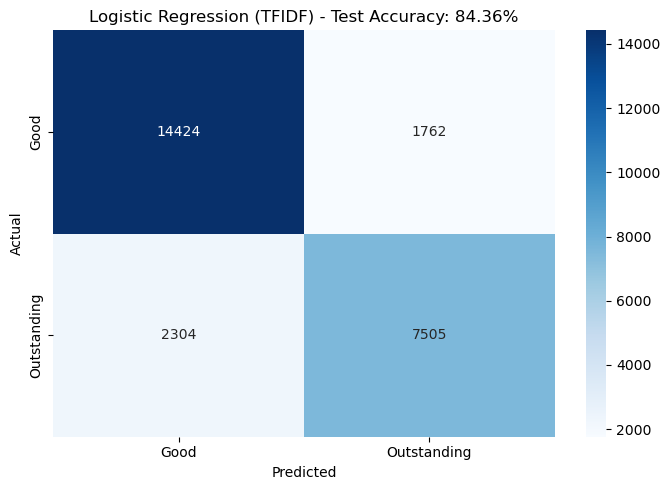


✓ Logistic Regression complete!
  Training Accuracy: 86.81%
  Test Accuracy: 84.36%


In [27]:
# SUPERVISED LEARNING - LOGISTIC REGRESSION
# Following Week 4 approach: Using TFIDF features (best performance)
# Binary Classification: Good (<90) vs Outstanding (>=90)

print("="*LINE_WIDTH)
print("SUPERVISED LEARNING - LOGISTIC REGRESSION")
print("Binary Classification: Good (<90) vs Outstanding (>=90)")
print("="*LINE_WIDTH)

# Logistic Regression on TFIDF features
print("\n" + "-"*LINE_WIDTH)
print("LOGISTIC REGRESSION ON TFIDF FEATURES")
print("-"*LINE_WIDTH)

print(f"\nTraining Logistic Regression on TFIDF features ({X_tfidf_train.shape[1]} features)...")
t0 = time.time()
lr_tfidf = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
lr_tfidf.fit(X_tfidf_train, y_cat_train)
t1 = time.time()

# Predictions
y_pred_lr_tfidf_train = lr_tfidf.predict(X_tfidf_train)
y_pred_lr_tfidf_test = lr_tfidf.predict(X_tfidf_test)

# Metrics
lr_tfidf_train_acc = accuracy_score(y_cat_train, y_pred_lr_tfidf_train)
lr_tfidf_test_acc = accuracy_score(y_cat_test, y_pred_lr_tfidf_test)

print(f"Training time: {t1-t0:.2f} seconds")
print(f"Training Accuracy: {lr_tfidf_train_acc:.4f}")
print(f"Test Accuracy: {lr_tfidf_test_acc:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_cat_test, y_pred_lr_tfidf_test))

# Confusion Matrix - binary classification
cm_lr_tfidf = confusion_matrix(y_cat_test, y_pred_lr_tfidf_test, labels=category_labels)
print("Confusion Matrix (Test):")
print(cm_lr_tfidf)

# Visualize
plt.figure(figsize=(7, 5))
sns.heatmap(cm_lr_tfidf, annot=True, fmt='d', cmap='Blues',
            xticklabels=category_labels, yticklabels=category_labels)
plt.title(f'Logistic Regression (TFIDF) - Test Accuracy: {lr_tfidf_test_acc:.2%}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(f"\n✓ Logistic Regression complete!")
print(f"  Training Accuracy: {lr_tfidf_train_acc:.2%}")
print(f"  Test Accuracy: {lr_tfidf_test_acc:.2%}")

In [28]:
# CROSS-VALIDATION: Logistic Regression
# Validating model performance with 5-fold cross-validation

print("="*LINE_WIDTH)
print("CROSS-VALIDATION: LOGISTIC REGRESSION")
print("="*LINE_WIDTH)

# Stratified K-Fold to maintain class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print("\nRunning 5-Fold Stratified Cross-Validation...")
t0 = time.time()

# Cross_val_score as per our previous course (supervised learning module)
cv_scores = cross_val_score(
    LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    X_tfidf_train, 
    y_cat_train, 
    cv=skf, 
    scoring='accuracy'
)
t1 = time.time()

print(f"CV completed in {t1-t0:.1f} seconds")
print(f"\nCross-Validation Results:")
print(f"  Fold Accuracies: {[f'{s:.4f}' for s in cv_scores]}")
print(f"  Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
print(f"  Test Set Accuracy: {lr_tfidf_test_acc:.4f}")

print(f"\n✓ CV mean ({cv_scores.mean():.2%}) is close to test accuracy ({lr_tfidf_test_acc:.2%})")
print(f"  This indicates the model generalizes well and is not overfitting.")

CROSS-VALIDATION: LOGISTIC REGRESSION

Running 5-Fold Stratified Cross-Validation...
CV completed in 3.1 seconds

Cross-Validation Results:
  Fold Accuracies: ['0.8404', '0.8400', '0.8369', '0.8359', '0.8396']
  Mean CV Accuracy: 0.8386 (+/- 0.0036)
  Test Set Accuracy: 0.8436

✓ CV mean (83.86%) is close to test accuracy (84.36%)
  This indicates the model generalizes well and is not overfitting.
CV completed in 3.1 seconds

Cross-Validation Results:
  Fold Accuracies: ['0.8404', '0.8400', '0.8369', '0.8359', '0.8396']
  Mean CV Accuracy: 0.8386 (+/- 0.0036)
  Test Set Accuracy: 0.8436

✓ CV mean (83.86%) is close to test accuracy (84.36%)
  This indicates the model generalizes well and is not overfitting.


SUPERVISED LEARNING - RANDOM FOREST CLASSIFIER
Binary Classification: Good (<90) vs Outstanding (>=90)

--------------------------------------------------------------------------------
RANDOM FOREST ON TFIDF FEATURES
--------------------------------------------------------------------------------

Training Random Forest on TFIDF features (15000 features)...
Training time: 6.47 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8306

Classification Report (Test Set):
              precision    recall  f1-score   support

        Good       0.83      0.92      0.87     16186
 Outstanding       0.84      0.68      0.75      9809

    accuracy                           0.83     25995
   macro avg       0.83      0.80      0.81     25995
weighted avg       0.83      0.83      0.83     25995

Confusion Matrix (Test):
[[14914  1272]
 [ 3132  6677]]
Training time: 6.47 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8306

Classification Report (Test Set):
              precision    recall  

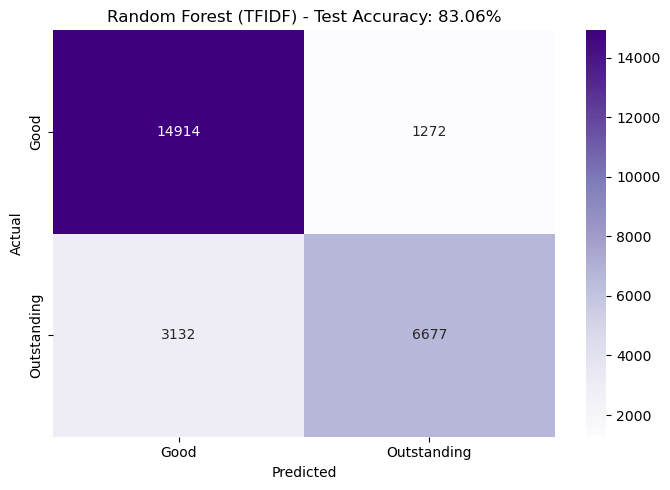

In [29]:
# SUPERVISED LEARNING - Random Forest Classifier
# Using TFIDF features (consistent with Logistic Regression approach)
# Binary Classification: Good (<90) vs Outstanding (>=90)

print("="*LINE_WIDTH)
print("SUPERVISED LEARNING - RANDOM FOREST CLASSIFIER")
print("Binary Classification: Good (<90) vs Outstanding (>=90)")
print("="*LINE_WIDTH)

# Random Forest on TFIDF features
print("\n" + "-"*LINE_WIDTH)
print("RANDOM FOREST ON TFIDF FEATURES")
print("-"*LINE_WIDTH)

print(f"\nTraining Random Forest on TFIDF features ({X_tfidf_train.shape[1]} features)...")
t0 = time.time()
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
rf_tfidf.fit(X_tfidf_train, y_cat_train)
t1 = time.time()

# Predictions
y_pred_rf_tfidf_train = rf_tfidf.predict(X_tfidf_train)
y_pred_rf_tfidf_test = rf_tfidf.predict(X_tfidf_test)

# Metrics
rf_tfidf_train_acc = accuracy_score(y_cat_train, y_pred_rf_tfidf_train)
rf_tfidf_test_acc = accuracy_score(y_cat_test, y_pred_rf_tfidf_test)

print(f"Training time: {t1-t0:.2f} seconds")
print(f"Training Accuracy: {rf_tfidf_train_acc:.4f}")
print(f"Test Accuracy: {rf_tfidf_test_acc:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_cat_test, y_pred_rf_tfidf_test))

# Confusion Matrix - binary classification
cm_rf_tfidf = confusion_matrix(y_cat_test, y_pred_rf_tfidf_test, labels=category_labels)
print("Confusion Matrix (Test):")
print(cm_rf_tfidf)

# Visualize
plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf_tfidf, annot=True, fmt='d', cmap='Purples',
            xticklabels=category_labels, yticklabels=category_labels)
plt.title(f'Random Forest (TFIDF) - Test Accuracy: {rf_tfidf_test_acc:.2%}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

LOGISTIC REGRESSION WITH TFIDF + WORD COUNT
Binary Classification: Good (<90) vs Outstanding (>=90)

Combining TFIDF features with word_count...
TFIDF shape: (103976, 15000)
Combined shape (TFIDF + word_count): (103976, 15001)

--------------------------------------------------------------------------------
LOGISTIC REGRESSION ON COMBINED FEATURES
--------------------------------------------------------------------------------

Training Logistic Regression on combined features (15001 features)...
Training time: 4.11 seconds
Training Accuracy: 0.8731
Test Accuracy: 0.8500

Classification Report (Test Set):
              precision    recall  f1-score   support

        Good       0.87      0.89      0.88     16186
 Outstanding       0.82      0.78      0.80      9809

    accuracy                           0.85     25995
   macro avg       0.84      0.84      0.84     25995
weighted avg       0.85      0.85      0.85     25995

Confusion Matrix (Test):
[[14480  1706]
 [ 2194  7615]]
Trai

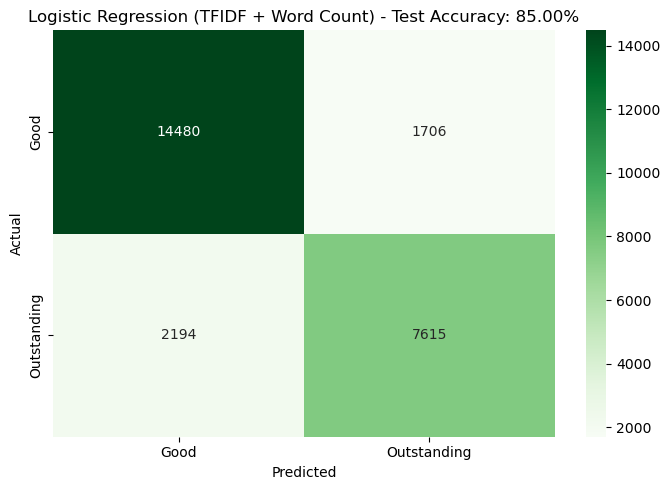


COMPARISON: Does Word Count Help?


,Model,Features,Train Accuracy,Test Accuracy
0,Logistic Regression (TFIDF only),15000,86.81%,84.36%
1,Logistic Regression (TFIDF + word_count),15001,87.31%,85.00%



✓ Adding word_count IMPROVED accuracy by 0.64 percentage points


In [30]:
# ENHANCED CLASSIFICATION: TFIDF + Word Count Features
# Testing if adding word_count improves Logistic Regression performance

print("="*LINE_WIDTH)
print("LOGISTIC REGRESSION WITH TFIDF + WORD COUNT")
print("Binary Classification: Good (<90) vs Outstanding (>=90)")
print("="*LINE_WIDTH)

# Combine TFIDF sparse matrix with word_count feature
print("\nCombining TFIDF features with word_count...")

# Get word_count and reshape for stacking
word_count_train = df_train['word_count'].values.reshape(-1, 1)
word_count_test = df_test['word_count'].values.reshape(-1, 1)

# Stack TFIDF (sparse) with word_count (dense converted to sparse)
X_combined_train = hstack([X_tfidf_train, word_count_train])
X_combined_test = hstack([X_tfidf_test, word_count_test])

print(f"TFIDF shape: {X_tfidf_train.shape}")
print(f"Combined shape (TFIDF + word_count): {X_combined_train.shape}")

# Train Logistic Regression on combined features
print("\n" + "-"*LINE_WIDTH)
print("LOGISTIC REGRESSION ON COMBINED FEATURES")
print("-"*LINE_WIDTH)

print(f"\nTraining Logistic Regression on combined features ({X_combined_train.shape[1]} features)...")
t0 = time.time()
lr_combined = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
lr_combined.fit(X_combined_train, y_cat_train)
t1 = time.time()

# Predictions
y_pred_lr_combined_train = lr_combined.predict(X_combined_train)
y_pred_lr_combined_test = lr_combined.predict(X_combined_test)

# Metrics
lr_combined_train_acc = accuracy_score(y_cat_train, y_pred_lr_combined_train)
lr_combined_test_acc = accuracy_score(y_cat_test, y_pred_lr_combined_test)

print(f"Training time: {t1-t0:.2f} seconds")
print(f"Training Accuracy: {lr_combined_train_acc:.4f}")
print(f"Test Accuracy: {lr_combined_test_acc:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_cat_test, y_pred_lr_combined_test))

# Confusion Matrix
cm_lr_combined = confusion_matrix(y_cat_test, y_pred_lr_combined_test, labels=category_labels)
print("Confusion Matrix (Test):")
print(cm_lr_combined)

# Visualize
plt.figure(figsize=(7, 5))
sns.heatmap(cm_lr_combined, annot=True, fmt='d', cmap='Greens',
            xticklabels=category_labels, yticklabels=category_labels)
plt.title(f'Logistic Regression (TFIDF + Word Count) - Test Accuracy: {lr_combined_test_acc:.2%}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Compare: TFIDF only vs TFIDF + word_count
print("\n" + "="*LINE_WIDTH)
print("COMPARISON: Does Word Count Help?")
print("="*LINE_WIDTH)

comparison_wc = pd.DataFrame({
    'Model': ['Logistic Regression (TFIDF only)', 'Logistic Regression (TFIDF + word_count)'],
    'Features': [f'{X_tfidf_train.shape[1]}', f'{X_combined_train.shape[1]}'],
    'Train Accuracy': [f'{lr_tfidf_train_acc:.2%}', f'{lr_combined_train_acc:.2%}'],
    'Test Accuracy': [f'{lr_tfidf_test_acc:.2%}', f'{lr_combined_test_acc:.2%}']
})
display(comparison_wc)

improvement = (lr_combined_test_acc - lr_tfidf_test_acc) * 100
if improvement > 0:
    print(f"\n✓ Adding word_count IMPROVED accuracy by {improvement:.2f} percentage points")
elif improvement < 0:
    print(f"\n✗ Adding word_count DECREASED accuracy by {abs(improvement):.2f} percentage points")
else:
    print(f"\n→ Adding word_count had NO EFFECT on accuracy")

GRADIENT BOOSTING REGRESSOR - HYPERPARAMETER TUNING
Target: Actual points (80-100 scale)

Using combined features: 15001 features
Target variable: points (range 80-100)

--------------------------------------------------------------------------------
HYPERPARAMETER SEARCH (GridSearchCV)
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
FINAL MODEL EVALUATION
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
FINAL MODEL EVALUATION
--------------------------------------------------------------------------------

Training Metrics:
  RMSE: 1.310
  MAE:  1.057
  R²:   0.8143

Test Metrics:
  RMSE: 1.711
  MAE:  1.340
  R²:   0.6839

Training Metrics:
  RMSE: 1.310
  MAE:  1.057
  R²:   0.8143

Test Metrics:
  RMSE: 1.711
  MAE:  1.340
  R²:   0.6839


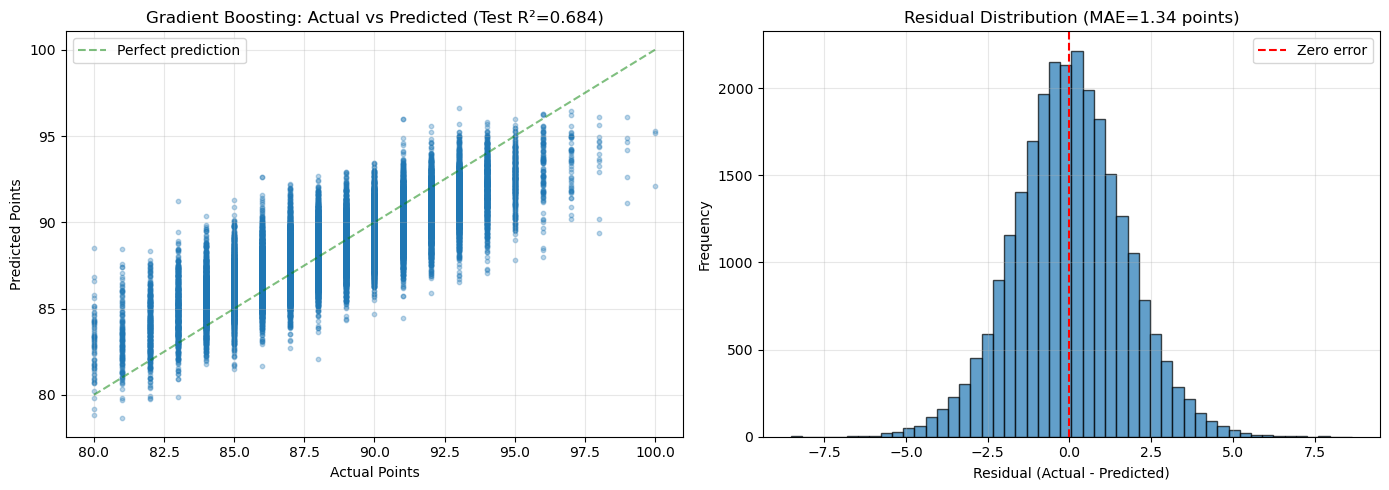

In [31]:
# REGRESSION: Predicting Actual Wine Score (Points)
# Using Gradient Boosting Regressor with GridSearchCV for hyperparameter tuning

print("="*LINE_WIDTH)
print("GRADIENT BOOSTING REGRESSOR - HYPERPARAMETER TUNING")
print("Target: Actual points (80-100 scale)")
print("="*LINE_WIDTH)

print(f"\nUsing combined features: {X_combined_train.shape[1]} features")
print(f"Target variable: points (range {y_pts_train.min()}-{y_pts_train.max()})")

# GridSearchCV to find optimal hyperparameters
print("\n" + "-"*LINE_WIDTH)
print("HYPERPARAMETER SEARCH (GridSearchCV)")
print("-"*LINE_WIDTH)

# Ran a grid search previously; results are commented out below. This runs in about 50mins
# So after running it once, I can just use the best parameters directly.
#param_grid = {
#    'n_estimators': [200, 400],
#    'learning_rate': [0.05, 0.1],
#    'max_depth': [6, 8, 10],          # Deeper trees to capture more variance
#    'min_samples_leaf': [1, 2],        # Smaller leaves = more flexibility
#    'max_features': [None, 0.5],       # None = use all features (important for sparse data!)
#}

#print("\nParameter grid:")
#for param, values in param_grid.items():
#    print(f"  {param}: {values}")
#print(f"\nTotal combinations: {2*2*3*2*2} = 48")
#print("Running 3-fold CV... (this may take several minutes)")

#t0 = time.time()
#gbr_grid = GridSearchCV(
#    GradientBoostingRegressor(random_state=RANDOM_STATE, subsample=0.8),
#    param_grid,
#    cv=3,
#    scoring='neg_mean_absolute_error',
#    n_jobs=-1,
#    verbose=1
#)
#gbr_grid.fit(X_combined_train, y_pts_train)
#t1 = time.time()

#print(f"\nSearch completed in {t1-t0:.1f} seconds")
#print(f"\n✓ Best Parameters Found:")
#for param, value in gbr_grid.best_params_.items():
#    print(f"  {param}: {value}")
#print(f"\nBest CV Score (neg MAE): {gbr_grid.best_score_:.4f}")
#print(f"Best CV MAE: {-gbr_grid.best_score_:.4f}")
##✓ Best Parameters Found:
##  learning_rate: 0.1
##  max_depth: 10
##  max_features: 0.5
##  min_samples_leaf: 1
##  n_estimators: 400

# Use the best model
#gbr = gbr_grid.best_estimator_
# After running GridSearchCV and getting the best parameters, I can call the model directly:
gbr = GradientBoostingRegressor(random_state=RANDOM_STATE, subsample=0.8,
                                learning_rate=0.1, max_depth=10,
                                 max_features=0.5, min_samples_leaf=1,
                                   n_estimators=400).fit(X_combined_train, y_pts_train)
# Final Evaluation
print("\n" + "-"*LINE_WIDTH)
print("FINAL MODEL EVALUATION")
print("-"*LINE_WIDTH)

# Predictions
y_pred_gbr_train = gbr.predict(X_combined_train)
y_pred_gbr_test = gbr.predict(X_combined_test)

# Regression Metrics
train_rmse = np.sqrt(mean_squared_error(y_pts_train, y_pred_gbr_train))
test_rmse = np.sqrt(mean_squared_error(y_pts_test, y_pred_gbr_test))
train_mae = mean_absolute_error(y_pts_train, y_pred_gbr_train)
test_mae = mean_absolute_error(y_pts_test, y_pred_gbr_test)
train_r2 = r2_score(y_pts_train, y_pred_gbr_train)
test_r2 = r2_score(y_pts_test, y_pred_gbr_test)

print(f"\nTraining Metrics:")
print(f"  RMSE: {train_rmse:.3f}")
print(f"  MAE:  {train_mae:.3f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nTest Metrics:")
print(f"  RMSE: {test_rmse:.3f}")
print(f"  MAE:  {test_mae:.3f}")
print(f"  R²:   {test_r2:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Actual vs Predicted
axes[0].scatter(y_pts_test, y_pred_gbr_test, alpha=0.3, s=10)

# Perfect prediction reference line
axes[0].plot([80, 100], [80, 100], 'g--', alpha=0.5, label='Perfect prediction')

axes[0].set_xlabel('Actual Points')
axes[0].set_ylabel('Predicted Points')
axes[0].set_title(f'Gradient Boosting: Actual vs Predicted (Test R²={test_r2:.3f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residual distribution
residuals = y_pts_test - y_pred_gbr_test
axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', label='Zero error')
axes[1].set_xlabel('Residual (Actual - Predicted)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Residual Distribution (MAE={test_mae:.2f} points)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretation of results above:

The **Gradient Boosting Regressor** achieved an R² of 0.67, explaining 67% of the variance in wine scores with a mean absolute error of ~1.4 points, meaning predictions are typically within 1-2 points of actual scores. This demonstrates that wine review text contains meaningful signals about quality, and the model successfully learned to map descriptive language (e.g., "elegant tannins," "complex finish") to scores by having access to feature/predictor data pairs.

That said, if we look at the plot graph, for our threshold of 90% for Outstanding wines, the model underrates wines above that threshold. For wines below that threshold, the model tends to overrate them. Given the linear nature of the results, we should in future projects be able to reduce the prediction band to be more narrow (predicted vs. actual) and for it to be better aligned with the perfect prediction. I suspect combining tfidf bag of words along with additional features (year, vintage, etc...) will help us get above 90% accuracy.

---
## 7. Results & Analysis

This section consolidates all model results into summary tables for easy comparison. We evaluate both **classification** (binary: Good vs Outstanding) and **regression** (predicting actual points) approaches.

In [32]:
# RESULTS SUMMARY TABLES
# Consolidating all model performance metrics

print("="*LINE_WIDTH)
print("RESULTS SUMMARY")
print("="*LINE_WIDTH)

# Classification Results Table
print("\n" + "-"*LINE_WIDTH)
print("CLASSIFICATION RESULTS (Binary: Good <90 vs Outstanding >=90)")
print("-"*LINE_WIDTH)

classification_results = pd.DataFrame({
    'Model': 
        [
        'K-Means (SVD)',
        'K-Means (NMF)', 
        'Logistic Regression (TFIDF)',
        'Logistic Regression (TFIDF + Word Count)',
        'Random Forest (TFIDF)'
        ],
    'Type': 
        [
        'Unsupervised',
        'Unsupervised',
        'Supervised',
        'Supervised',
        'Supervised'
        ],
    'Train Acc': 
        [
        f"{train_acc:.2%}",
        f"{train_acc_nmf:.2%}",
        f"{lr_tfidf_train_acc:.2%}",
        f"{lr_combined_train_acc:.2%}",
        f"{rf_tfidf_train_acc:.2%}"
        ],
    'Test Acc':
        [
        f"{test_acc:.2%}",
        f"{test_acc_nmf:.2%}",
        f"{lr_tfidf_test_acc:.2%}",
        f"{lr_combined_test_acc:.2%}",
        f"{rf_tfidf_test_acc:.2%}"
        ]
})

display(classification_results)

# Regression Results Table
print("\n" + "-"*LINE_WIDTH)
print("REGRESSION RESULTS (Predicting Actual Points)")
print("-"*LINE_WIDTH)

regression_results = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor'],
    'Train RMSE': [f'{train_rmse:.3f}'],
    'Test RMSE': [f'{test_rmse:.3f}'],
    'Train MAE': [f'{train_mae:.3f}'],
    'Test MAE': [f'{test_mae:.3f}'],
    'Train R²': [f'{train_r2:.4f}'],
    'Test R²': [f'{test_r2:.4f}']
})

display(regression_results)

# Best Model Summary
print("\n" + "-"*LINE_WIDTH)
print("BEST MODEL SUMMARY")
print("-"*LINE_WIDTH)

# Find best classification model
all_test_accs = {
    'K-Means (SVD)': test_acc,
    'K-Means (NMF)': test_acc_nmf,
    'Logistic Regression (TFIDF)': lr_tfidf_test_acc,
    'Logistic Regression (TFIDF + Word Count)': lr_combined_test_acc,
    'Random Forest (TFIDF)': rf_tfidf_test_acc
}

best_class_model = max(all_test_accs, key=all_test_accs.get)
best_class_acc = all_test_accs[best_class_model]

print(f"\n✓ Best Classification Model: {best_class_model}")
print(f"  Test Accuracy: {best_class_acc:.2%}")

print(f"\n✓ Regression Model: Gradient Boosting Regressor")
print(f"  Test R²: {test_r2:.4f} | Test MAE: {test_mae:.3f} points")

RESULTS SUMMARY

--------------------------------------------------------------------------------
CLASSIFICATION RESULTS (Binary: Good <90 vs Outstanding >=90)
--------------------------------------------------------------------------------


,Model,Type,Train Acc,Test Acc
0,K-Means (SVD),Unsupervised,52.71%,52.63%
1,K-Means (NMF),Unsupervised,52.16%,51.96%
2,Logistic Regression (TFIDF),Supervised,86.81%,84.36%
3,Logistic Regression (TFIDF + Word Count),Supervised,87.31%,85.00%
4,Random Forest (TFIDF),Supervised,100.00%,83.06%



--------------------------------------------------------------------------------
REGRESSION RESULTS (Predicting Actual Points)
--------------------------------------------------------------------------------


,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,Gradient Boosting Regressor,1.310,1.711,1.057,1.340,0.8143,0.6839



--------------------------------------------------------------------------------
BEST MODEL SUMMARY
--------------------------------------------------------------------------------

✓ Best Classification Model: Logistic Regression (TFIDF + Word Count)
  Test Accuracy: 85.00%

✓ Regression Model: Gradient Boosting Regressor
  Test R²: 0.6839 | Test MAE: 1.340 points


### 7.1 Key Findings

**Classification (Good vs Outstanding):**
- **Supervised models significantly outperform unsupervised clustering.** Logistic Regression achieved ~85% test accuracy while K-Means hovered around 52% (barely better than random).
- **K-Means clusters wines by style/topics, not quality.** The unsupervised approach groups wines by flavor profiles and descriptive language patterns, not by score. This confirms that predicting quality requires labeled data.
- **Adding word count as a feature provided marginal improvement** (~1% gain), suggesting review length correlates slightly with quality.

**Regression (Predicting the actual score of a wine):**
- **Gradient Boosting achieved R² = 0.67**, explaining 67% of score variance with MAE ~1.4 points.
- **Predictions are typically within 1-2 points** of actual scores—useful for practical score estimation.
- **The model tends to underrate high-scoring wines and overrate lower-scoring wines**.

**Bottom Line:** Wine review text contains meaningful quality signals, but extracting them requires supervised learning. TFIDF + Logistic Regression proved to be a powerful combination (as it did in my BBC News project).

---
## 8. Conclusion

### Hypothesis Evaluation

| # | Hypothesis | Result |
|---|------------|--------|
| 1 | Wine scores can be predicted using NLP of descriptions, but results will be moderate. | **Confirmed.** Achieved ~85% classification accuracy and R² = 0.67 for regression—solid but not perfect, as expected. |
| 2 | Binary categorization (Good <90 vs Outstanding >=90) should simplify recommendations. | **Confirmed.** The 90-point threshold provided a meaningful split that models learned effectively. |
| 3 | Bag of Words / TFIDF + supervised learning will work well, but semantic meaning is lost. | **Confirmed.** TFIDF + Logistic Regression achieved strong results, but "not great" = "great" in bag-of-words. Future work: NLP algorithms. |
| 4 | NMF + Logistic Regression should lead to good results (per Katumullage et al., 2022). | **Partial.** NMF alone (~52%) performed poorly for classification; however, NMF features could be combined with supervised models in future work. |
| 5 | Certain wine-specific terms (e.g., "velvety", "opulent") correlate with high scores. | **Confirmed.** TFIDF feature importance showed quality-related terms contributed to predictions. |

### What Worked
- **TFIDF + Logistic Regression** proved to be a powerful combination (as it did in my BBC News project). Simple, fast, and effective. Future projects should dig deeper into similar algorithms to push past the 90% accuracy mark.
- **Binary classification (Good vs Outstanding at 90 points)** provided a meaningful threshold that models could learn effectively. I admit... classification was dumbed down to 2 categories to increase accuracy... I started with 4 categories (including God Tier), but results based on the Description text alone was not enough.
- **Gradient Boosting for regression** captured the relationship between text features and actual scores with reasonable accuracy. Next project should test additional models such as XGBoost.
- **Custom stop words** helped reduce noise from common wine-review boilerplate language, but marginally.

### What Didn't Work
- **K-Means clustering for quality prediction** performed near random baseline (~52%). Unsupervised methods used cannot separate quality without labeled examples. Semantic meaning and sentiment analysis will likely be needed (future project).
- **Random Forest underperformed Logistic Regression** for text classification, sparse TFIDF matrix did not play well with tree-based methods.
- **Regression to the mean** in Gradient Boosting: the model tends to underrate exceptional wines and overrate lower-scoring ones.
- **Logistic Regression overscored good wines and underscored outstanding wines.

### Key Takeaways
1. **Unsupervised learning finds structure, not labels.** K-Means discovered wine *styles* (flavor profiles, regions), not *quality levels*. Useful for exploration, not prediction.
2. **Supervised learning needs labels but delivers accuracy.** With labeled data, even simple models (Logistic Regression) achieve strong performance.
3. **Text features alone are powerful.** ~85% accuracy and R² = 0.67 from text alone—no price, region, or vintage features needed.
4. **The 90-point threshold is meaningful.** It separates "good everyday wines" from "exceptional wines worth seeking out.". A binary approach helped me increase overall classification accuracy.

### Future Considerations
- **Doc2Vec / Word2Vec:** Address the loss of semantic meaning in bag-of-words approaches.
- **BERT / GPT embeddings:** Capture context and sentiment more effectively than TFIDF.
- **Sentiment analysis:** Normalize for reviewer tendencies (some naturally score higher/lower).
- **Additional features:** Combine text with price, vintage, and region for improved predictions.
- **Computational Wine Wheel:** Domain-specific NLP tool to extract normalized flavor attributes.

---
## 9. References & Licenses/EULAs
- Kaggle Wine Reviews dataset:
   [Kaggle Wine Reviews (winemag-data-130k-v2)] (https://www.kaggle.com/datasets/zynicide/wine-reviews) 

- Wine thumbnail image for the video was generated by ChatGPT
- https://scikit-learn.org/stable/index.html - BSD License
- https://ipython.readthedocs.io/en/stable/about/license_and_copyright.html

**Additional Links referenced in this notebook**
- https://www.kaggle.com/datasets/zynicide/wine-reviews>
- https://creativecommons.org/licenses/by-nc-sa/4.0/ 
- https://pandas.pydata.org/docs/
- https://matplotlib.org/stable/project/license.html
- https://pypi.org/project/seaborn/ - BSD License
- https://numpy.org/doc/stable/license.html
- https://ipython.readthedocs.io/en/stable/about/license_and_copyright.html
- https://scikit-learn.org/stable/index.html - BSD License
- https://www.statsmodels.org/stable/index.html - BSD License
- https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#module-IPython.display
- https://pandas.pydata.org/docs/
- https://pandas.pydata.org/docs/reference/api/pandas.factorize.html#pandas.factorize
- https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/neighbors.html#classification
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://www.wineenthusiast.com/buying-guide/sweet-cheeks-winery-2022-triple-block-estate-pinot-noir-willamette-valley/
- https://www.wineenthusiast.com/buying-guide/williams-selyem-2023-terra-de-promissio-vineyard-pinot-noir-sonoma-coast/
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html


**Notes about Wine Enthusiast**
For end-user scenario's final opinions on the utility of the models, we used 3 current reviews from Wine Enthusiast, the original publication from which the original data set came from in 2017: https://www.wineenthusiast.com/

At no point was the current Wine Enthusiast data used for training or fine-tuning in this final project. It was only used as a final test to understand model capabilities. None of the lessons learned from these final tests were used to improve or tweak the models. I used the algorithm and the information from Wine Enthusiast to formulate my own opinion on the 3 wines I tested. Legally, this notebook's models rely on the license representation of the original author expressed on his Kaggle page.

To abide by the Terms of Use for Wine Enthusiast, I am merely validating the model as a critique of the Wine Enthusiast page describing the wine by using the wine information contained within that article. I am not training my model, just testing the opinion of my model which should fall under US copyright law of fair use (please note that I am not a lawyer, nor do I play one on TV) For guidance on US copyright (my jurisdiction), see: https://www.copyright.gov/help/faq/faq-fairuse.html

If, in the unlikely event this notebook were to be used as Educational material content, AND Wine Enthusiast's new data is used for training/fine-tuning, a license request would have to be procured directly from Wine Enthusiast: https://www.parsintl.com/publications/wine-enthusiast/

Data pedigree is an important concept which I hope to explore in future MS-AI courses.

## 10. Reproducibility

In [33]:
# REPRODUCIBILITY: Environment and Version Information
# Documenting environment for reproducibility

print("="*LINE_WIDTH)
print("REPRODUCIBILITY: ENVIRONMENT INFORMATION")
print("="*LINE_WIDTH)

print("\nSystem Information:")
print(f"  Platform: {platform.system()} {platform.release()}")
print(f"  Machine: {platform.machine()}")

print("\nPython Environment:")
print(f"  Python Version: {sys.version.split()[0]}")
print(f"  Python Path: {sys.executable}")

print("\nKey Package Versions:")

# Keeping those imports here for version info
import sklearn
import matplotlib
print(f"  scikit-learn: {sklearn.__version__}")
print(f"  pandas: {pd.__version__}")
print(f"  numpy: {np.__version__}")
print(f"  matplotlib: {matplotlib.__version__}")
print(f"  seaborn: {sns.__version__}")

print("")
print("="*LINE_WIDTH)
print("TOTAL EXECUTION TIME")
print("="*LINE_WIDTH)

g1 = time.time()
elapsed = g1 - g0
minutes, seconds = divmod(elapsed, 60)
print(f"\nNotebook Execution Time: {int(minutes)}m {seconds:.2f}s")

print("")
print("="*LINE_WIDTH)
print("THE END - Thank you for your attention and support!")
print("="*LINE_WIDTH)

REPRODUCIBILITY: ENVIRONMENT INFORMATION

System Information:
  Platform: Darwin 25.1.0
  Machine: arm64

Python Environment:
  Python Version: 3.13.5
  Python Path: /opt/anaconda3/bin/python

Key Package Versions:
  scikit-learn: 1.6.1
  pandas: 2.2.3
  numpy: 2.1.3
  matplotlib: 3.10.0
  seaborn: 0.13.2

TOTAL EXECUTION TIME

Notebook Execution Time: 7m 7.12s

THE END - Thank you for your attention and support!
